# Pregunta 3 - Análisis de emociones en tweets


El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud que se manifiesta con respecto a un tópico o contexto de comunicación. El análisis de emociones ha sido extendido a varios medios en la actualidad, como lo son las redes sociales.
La conocida red social Twitter tiene una gran cantidad de usuarios, por lo que la información se genera a
cada segundo y el análisis de texto ha tomado bastante fuerza. La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente sus usuarios así como el manejo de negaciones, sarcasmo y abreviaciones en una frase.  

Para esta actividad se trabajará con un dataset de tweets ofrecidos por CrowdFlower. Cada tweet está
asociado a una emoción en particular, donde los conjunto de emociones se trabajarán excluyentemente, siendo un problema de múltiples clases.


#### a. Construir un dataframe con los datos, determinar clases y registros por clase.

In [1]:
import pandas as pd
df = pd.read_csv('text_emotion.csv')

In [2]:
print (df.shape)
print (df.columns)

(40000, 4)
Index(['tweet_id', 'sentiment', 'author', 'content'], dtype='object')


El dataset sobre el cual se trabaja está compuesto por 40000 registros. Cada uno de ellos descrito por 4 características que son 'tweet_id', 'sentiment', 'author' y 'content'.  
Los primeros registros del dataset se muestran a continuación:

In [3]:
df.head()

tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...

Se observa que los registros describen 40000 tweets (content) emitidos por diferentes usuarios (author), cada uno asociado principalmene a una emoción (sentiment).  
Para esta sección se trabajará en base a los tweets almacenados (content) que se procesarán para realizar la futura clasificación de sentimientos de un post, es decir, la determinación de la emoción prioritaria asociada a un futuro tweet.

#### b. Construir un conjunto de entrenamiento y de pruebas, a través de una máscara aleatoria.

In [4]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

In [5]:
len(df_train.content)

31924

In [6]:
len(df_test.content)

8076

 Se aplica un máscara aleatoria (msk), la cual se especifica de modo que separe los datos en proporciones aproximadas a 80%-20% (train-test). Es decir, se guarda el 80% inicial de los datos/dataframe para aplicarlos a una futura máquina en el proceso de entrenamiento y el 20% restante de los datos se proponen ser utilizados para verificar los resultados de los algoritmos.  
 


#### c. Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estandarizado.

In [7]:
def remove_punctuation ( text ):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

remove_punctuation, tal como su nombre lo indica, remueve todas las expresiones literales de signos de puntuación del texto (text) ingresado. Esta función es necesaria puesto que los puntos,comas,signos de interrogación,etc no son de utilidad o, no aportan información, cuando se busca analizar textos.

In [8]:
from nltk.corpus import stopwords
import re, string
def pre_procesar(lista_posts):
    transformar2=[]
    for i in lista_posts:
        a=' '.join(re.sub("(@[A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",i).split())
        transformar2.append(a)
    transformar_low = [registro.lower() for registro in transformar2]
    transformar_tok = []
    for reg in transformar_low:
        transformar_tok.append(nltk.word_tokenize(remove_punctuation(reg)))

    stoplist = stopwords.words('english')
    transformar_stop=[]
    for reg in transformar_tok:
        clean = [token for token in reg if token not in stoplist ]
        transformar_stop.append(clean)
    transformar_clean1=[]
    for reg in transformar_tok:
        temp=[]
        for reg2 in reg:
            a= re.sub(r'\b[a-z]\b', ' ', reg2)
            if len(a)!=1:
                temp.append(a)
        transformar_clean1.append(temp)
    transformar_clean2=[]
    for reg in transformar_clean1:
        temp=[]
        for reg2 in reg:
            a=re.sub(r'\b[a-z][a-z]\b', ' ', reg2)
            if len(a)!=1:
                temp.append(a)
        transformar_clean2.append(temp)
    return transformar_clean2

pre_procesar lleva a cabo el proceso completo de limpieza del tweet a trabajar. 
Cómo?  
Recibe la lista de tweets del dataframe, se eliminan los posibles hashtags utilizados así como las páginas web/links que estén presentes en el post haciendo uso de expresiones regulares.  
Además de esto, se pasan todos los términos a minúsculas y se eliminan aquellos que corresponda a 'stopwords' es decir, aquellas palabras que no entreguen información por sí solas. Se eliminan también aquellas palabras de largo 1 y 2 que hayan permanecido en el tweet, es decir, palabras que todavía no hayan sido filtradas por la lista de los stopwords y que no representan un significado por sí mismas.  
Cabe destacar que este proceso es de gran importancia a la hora de proponerse analizar texto puesto que con esto se logra eliminar gran cantidad de términos no significativos y se obtiene un formato neutro que evita la duplicidad de palabras.  

A continuación se muestra la columna 'content' del dataframe de entrenamiento (df_train):

In [9]:
import scipy as sp
import matplotlib as plt
import nltk
transformar= df_train.content
print ("Los datos de entrenamiento están compuestos por", transformar.shape[0], "registros")
transformar.tolist()
print ("\nLos tweets orginales corresponden a: ")
print (transformar[:10])

Los datos de entrenamiento están compuestos por 31924 registros

Los tweets orginales corresponden a: 
0     @tiffanylue i know  i was listenin to bad habi...
1     Layin n bed with a headache  ughhhh...waitin o...
3                  wants to hang out with friends SOON!
4     @dannycastillo We want to trade with someone w...
5     Re-pinging @ghostridah14: why didn't you go to...
6     I should be sleep, but im not! thinking about ...
7                  Hmmm. http://www.djhero.com/ is down
9            @kelcouch I'm sorry  at least it's Friday?
10                                     cant fall asleep
11                              Choked on her retainers
Name: content, dtype: object


Se crea una nueva función 'to_text' que toma una lista de palabras separadas por término (tokenizada) y retorna la lista de tweets sin separaciones. Es decir, como una frase completa.  
Esta función es requerida puesto que algunos métodos a utilizar requieren como entrada una lista de textos con estas características (no tokenizada)

In [10]:
def to_text(lista_prepro):
    cleaned=[]
    for reg in lista_prepro:
        final = ""
        for reg2 in reg: 
            final += reg2 + " "
        cleaned.append(final)
    #cleaned[:10]
    return cleaned

In [11]:
preprocesa2= pre_procesar(transformar)
tweets_cleaned=to_text(preprocesa2)
len(tweets_cleaned)

31924

Se observa que el texto preprocesado corresponde efectivamente a los 32166 registros (tweets) de entrenamiento iniciales.


#### d. Hacer una reducción binaria al problema para trabajarlo como un problema de clasificacion de dos clases. 

Para este punto se propone agrupar las distintas emociones existente en el dataset como positivas y negativas definiciendo un criterio a gusto tal que las clases se lograsen codificar como 1 y −1 respectivamente teniendo presente que el desbalanceo de los datos puede afectar al modelo. Es decir, se debe cuidar el no etiquetar mayoritariamente los datos como pertenecientes a una clase en particular.

#### Clasificación de emociones positivas y negativas (manual)

In [12]:
e_posit=[]
e_negat=[]
emociones=df_train.sentiment
print (emociones[:10])
print (emociones.shape)

0          empty
1        sadness
3     enthusiasm
4        neutral
5          worry
6        sadness
7          worry
9        sadness
10       neutral
11         worry
Name: sentiment, dtype: object
(31924,)


Las emociones presentes en el dataset corresponden a 13 sentimientos. Cabe destacar que entre ellos, se encuentra la categoria 'empty' que, en estricto rigor, indica que no se logró detectar la emoción del tweet en cuestión.  
Las emociones presentes en los datos, con sus respectivas frecuencias de etiqueta, se especifican a continuación: 

In [83]:
freq_emoc= nltk.FreqDist(emociones)
freq_emoc

FreqDist({'anger': 88,
          'boredom': 143,
          'empty': 655,
          'enthusiasm': 613,
          'fun': 1436,
          'happiness': 4167,
          'hate': 1047,
          'love': 3074,
          'neutral': 6858,
          'relief': 1210,
          'sadness': 4105,
          'surprise': 1784,
          'worry': 6744})

Se observa que la emoción mayormente presente en el dataset corresponde a 'neutral' y 'worry', seguidas por 'happiness' y 'sadness'. Además es posible notar que, por sentido común, las etiquetas positivas sólo abarcan 'enthusiasm', 'fun', 'happiness', 'love' y 'relief', lo que corresponde a sólo 10000 aproximadamente.  
La distribución de estas emociones se puede apreciar en el siguiente gráfico:

In [84]:
x_plot= freq_emoc.keys()
y_plot= freq_emoc.values()

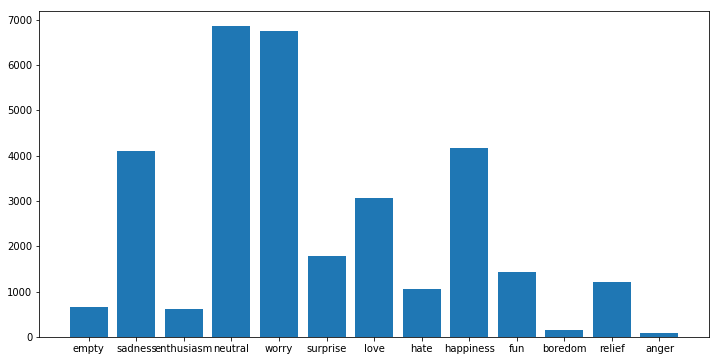

In [85]:
import matplotlib.pyplot as plt
xx=[]
yy=list(y_plot)
for i in range(len(x_plot)):
    xx.append(i)
fig = plt.figure(figsize=(12,6))
plt.bar(xx, yy, align='center')
LABELS=list(x_plot)
plt.xticks(xx, LABELS)
plt.show()

Para ayudar a la comprensión, se presentan igualmente 20 tweets del dataframe de entrenamiento (desde el 10 hasta el 30) 

In [16]:
df[10:30]

tweet_id sentiment           author  \
10  1956969456   neutral       feinyheiny   
11  1956969531     worry     dudeitsmanda   
12  1956970047   sadness         Danied32   
13  1956970424   sadness          Samm_xo   
14  1956970860  surprise     okiepeanut93   
15  1956971077   sadness           Sim_34   
16  1956971170      love     poppygallico   
17  1956971206   sadness  brokenangel1982   
18  1956971473     worry            LCJ82   
19  1956971586   sadness          cleepow   
20  1956971981     worry    andreagauster   
21  1956972097       fun    schiz0phren1c   
22  1956972116   neutral            jansc   
23  1956972270     worry        sweet8181   
24  1956972359   sadness   xamountoftruth   
25  1956972444     worry       jomama6881   
26  1956972557   sadness       LilithGaea   
27  1956972884     worry      oONEPTUNEOo   
28  1956973598   sadness  username_origin   
29  1956973690     worry    catchtheapple   

                                              content  
10                                   cant fall asleep  
11                            Choked on her retainers  
12  Ugh! I have to beat this stupid song to get to...  
13  @BrodyJenner if u watch the hills in london u ...  
14                                       Got the news  
15      The storm is here and the electricity is gone  
16                               @annarosekerr agreed  
17  So sleepy again and it's not even that late. I...  
18  @PerezHilton lady gaga tweeted about not being...  
19  How are YOU convinced that I have always wante...  
20  @raaaaaaek oh too bad! I hope it gets better. ...  
21  Wondering why I'm awake at 7am,writing a new s...  
22  No Topic Maps talks at the Balisage Markup Con...  
23  I ate Something I don't know what it is... Why...  
24  so tired and i think i'm definitely going to g...  
25  On my way home n having 2 deal w underage girl...  
26  @IsaacMascote  i'm sorry people are so rude to...  
27  Damm servers still down  i need to hit 80 befo...  
28  Fudge.... Just BS'd that whole paper.... So ti...  
29      I HATE CANCER. I HATE IT I HATE IT I HATE IT.

En vista del desbalanceo intuitivo de las emociones se considerarán como positivas igualmente todo aquel tweet cuya emoción ponderante sea 'neutral' pues no representa una emoción negativa y de este modo se lograrán balancear las etiquetas.

In [86]:
positive= ['enthusiasm', 'fun', 'happiness', 'love', 'relief', 'neutral']
negative= ['empty', 'sadness', 'worry', 'surprise', 'hate', 'boredom', 'anger']
positive_by_class = {'enthusiasm':0, 'fun':0, 'happiness':0, 'love':0, 'relief':0, 'neutral':0}
negative_by_class = {'empty':0, 'sadness':0, 'worry':0, 'surprise':0, 'hate':0, 'boredom':0, 'anger':0}
total_posit=0
total_negat=0
for i in LABELS:    
    if i in positive:
        total_posit+=yy[LABELS.index(i)]
        positive_by_class[i] += yy[LABELS.index(i)]
    else:
        total_negat+=yy[LABELS.index(i)]
        negative_by_class[i] -= yy[LABELS.index(i)]
print ("Número de registros con emociones positivas: ", total_posit)
print ("Número de registros con emociones negavivos: ", total_negat)

Número de registros con emociones positivas:  17358
Número de registros con emociones negavivos:  14566


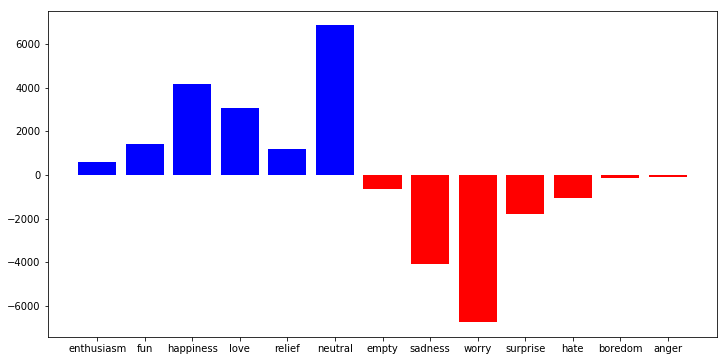

In [87]:
x_plotP= list(positive_by_class.keys())
y_plotP= list(positive_by_class.values())
x_plotN= list(negative_by_class.keys())
y_plotN= list(negative_by_class.values())
xs_plot = x_plotP+x_plotN
ys_plot= y_plotP+y_plotN
xx2= []
yy2=ys_plot
for i in range(len(xs_plot)):
    xx2.append(i)
fig = plt.figure(figsize=(12,6))
plt.bar(xx2, yy2, align='center', color=['blue', 'blue','blue', 'blue','blue', 'blue', 'red','red','red','red','red', 'red', 'red'])
LABELS=list(xs_plot)
plt.xticks(xx2, LABELS)
plt.show()

Así entonces, se procede a construir el vector 'classifications' que contiene las etiquetas de cada tweet de la forma 1 o -1 para las emociones positivas y negativas respectivamente.

In [88]:
classifications=[]
for i in emociones:
    if i in positive:
        classifications.append(1)
    else:
        classifications.append(-1)

print (classifications[:20])

[-1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1]


In [89]:
tweets_cleaned[:20]

['know was listenin bad habit earlier and started freakin his part ',
 'layin bed with headache ughhhh waitin your call ',
 'wants hang out with friends soon ',
 'want trade with someone who has houston tickets but one will ',
 'pinging why didn you prom didn like friends ',
 'should sleep but not thinking about old friend who want but married now damn amp wants scandalous ',
 'hmmm down ',
 'sorry least friday ',
 'cant fall asleep ',
 'choked her retainers ',
 'ugh have beat this stupid song get the next rude ',
 'watch the hills london will realise what tourture because were weeks and weeks late just watch itonlinelol ',
 'got the news ',
 'the storm here and the electricity gone ',
 'agreed ',
 'lady gaga tweeted about not being impressed her video leaking just you know ',
 'how are you convinced that have always wanted you what signals did give off damn think just lost another friend ',
 'too bad hope gets better been having sleep issues lately too ',
 'ate something don know what

### Método alternativo: Clasificación de emociones positivas y negativas automática

A continuación se presenta un método diferente para la determinación de la polaridad de un tweet haciendo uso de la libreria **nltk**. 

Se peropone utilizar el método SentimentIntensityAnalyzer() que obtiene la polaridad de cierto texto retornando la tasa de negatividad, positividaqd o neutralidad del texto.

In [90]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Se presenta un ejemplo del funcionamiento del método:

In [91]:
print (sid.polarity_scores('you re ugly'))
print (sid.polarity_scores('you'))
print (sid.polarity_scores('re'))
print (sid.polarity_scores('ugly'))

{'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5106}


Teniendo esto en consideración, se propone la siguiente clasificación de los tweets (como clase positiva o negativas a 1 y -1 respectivamente)

In [92]:
positivos=0
negativos=0
for i in tweets_cleaned:
    sentencia_preprocesada = i
    result=sid.polarity_scores(sentencia_preprocesada)
    print (sentencia_preprocesada, "\n", result)
    print ("")
    if result['neg']<result['pos']:
        positivos+=1
    else:
        negativos+=1

print (positivos)
print (negativos)

know was listenin bad habit earlier and started freakin his part  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5423}

layin bed with headache ughhhh waitin your call  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wants hang out with friends soon  
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.4767}

want trade with someone who has houston tickets but one will  
 {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.0387}

pinging why didn you prom didn like friends  
 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.6808}

should sleep but not thinking about old friend who want but married now damn amp wants scandalous  
 {'neg': 0.303, 'neu': 0.483, 'pos': 0.214, 'compound': -0.5267}

hmmm down  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sorry least friday  
 {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'compound': -0.0772}

cant fall asleep  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

choked her retainers  
 {'neg': 0.60

peeps still here fun times got sleep tho work the some cool hot chicks here but none cool missing her  
 {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.7954}

feels sick stomach and idkk whyy  
 {'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 'compound': -0.5106}

vineri nimic special sau probabil alt weekend pierdut  
 {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}

counting the hours lost sunshine until the weekend  
 {'neg': 0.2, 'neu': 0.522, 'pos': 0.278, 'compound': 0.2263}

dude just saw your pics looks like your mini excursion was pretty kick ass didn see any sun while was there tho  
 {'neg': 0.124, 'neu': 0.674, 'pos': 0.202, 'compound': 0.296}

home safely but hungry  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}

got final table but went out third don think getting free seat  
 {'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.6652}

good morning work this morning gutted lol nevermind  
 {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound

 {'neg': 0.654, 'neu': 0.346, 'pos': 0.0, 'compound': -0.4168}

time nodd off its gon long day tomorrow saying goodbye car for good  
 {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.4404}

fakin kisha just luck  
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4588}

taking nap after work sleep right now the nap felt soooo good but now seems like bad idea  
 {'neg': 0.19, 'neu': 0.601, 'pos': 0.208, 'compound': -0.1406}

counting the minutes when dad friend leaving  
 {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.4939}

miss oklahomaaaaa listening citizen cope til pass out  
 {'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.1531}

tense emotional not  
 {'neg': 0.48, 'neu': 0.2, 'pos': 0.32, 'compound': -0.2023}

have fun miss you guys lot  
 {'neg': 0.18, 'neu': 0.449, 'pos': 0.371, 'compound': 0.4019}

playing the game watching straight people hook but can leave because another reason  
 {'neg': 0.092, 'neu': 0.707, 'pos': 0.201, 'compound': 0.1406}

yeah 


still has half math worksheet science pages worksheet and english feels sniffle and dry eyes coming along too  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

miss seeing fireflies  
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.1531}

never has chance sleeping before midnight mind tired  
 {'neg': 0.436, 'neu': 0.564, 'pos': 0.0, 'compound': -0.5632}

was just alriiightt  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy home then mind wanders can sleep  
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

wan love drunk  
 {'neg': 0.316, 'neu': 0.132, 'pos': 0.553, 'compound': 0.4215}

weebo dying  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

cases swine flu  
 {'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.3818}

hopfully quiet one home cash anything then coming the pub 2moz watch the pups  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

got flat the way today pot hole another thing tick off the quot crap thi

quot toys quot advanced load carrying system low cost man outdoor shelter didn get the wolverine glove  
 {'neg': 0.11, 'neu': 0.785, 'pos': 0.105, 'compound': -0.0258}

didn drink enough for hangover just tired and over worked  
 {'neg': 0.244, 'neu': 0.756, 'pos': 0.0, 'compound': -0.4404}

cheeeks hurt bad what happened  
 {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.7845}

ï¿½ï¿½ grade mock  
 {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4215}

don think jon and kate should get divorce but think they want save their marriage they have quit the show  
 {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.6956}

think you should come tomarrow because was really really really looking foreword seeing you please come  
 {'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}

have nothing  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

off work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

know kids what not what say well don all really

selling 10jaffa race tickets friends are heartless they wont even buy one  
 {'neg': 0.196, 'neu': 0.613, 'pos': 0.19, 'compound': -0.0258}

ahhh fusterated  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yes boo for soar throats and earaches  
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}

think should hire one those tranlsators because one ever understands  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

see miles away  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

desperate the venice beinnale  
 {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.3182}

sleep work tomorrow  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ouch epic bruise between toes and lump just under ankle bad times  
 {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'compound': -0.5423}

got greatscores off while for exam yeaps  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ugly what programmes you have open  
 {'neg': 0.398, 'neu': 0.602, 'pos': 0.0, 

just finished the village love could watch over and over wonder why can get sleep tonight  
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}

sooo lost without car this truly depressing pregnant people should never this stressed out  
 {'neg': 0.389, 'neu': 0.457, 'pos': 0.154, 'compound': -0.631}

what wrong with people second break wallmans tonight  
 {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}

like the most saddest person jtv right now because you are not  
 {'neg': 0.256, 'neu': 0.595, 'pos': 0.149, 'compound': -0.4201}

leave fraser alone  
 {'neg': 0.762, 'neu': 0.238, 'pos': 0.0, 'compound': -0.296}

just upsets becasue like years have loved them and then this happens imm really uset now  
 {'neg': 0.114, 'neu': 0.594, 'pos': 0.292, 'compound': 0.5994}

marley and the saddest movie ever never cry movies but this movie mad cry  
 {'neg': 0.31, 'neu': 0.456, 'pos': 0.233, 'compound': -0.4003}

cars been dropped off for service and mot getting the tr

joined this because think smith chips invent flavour competion entry wont recognised its sweetpotatoe and seasalt flavour  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

pleb had take out the freezer and put the oven  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

they changed the way golden gaytimes are made they used awesome  
 {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.6249}

and most are going stuck office some without windows  
 {'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'compound': -0.3102}

was wondering where you were how come you didn twitter for week and yeah adam withdrawal syndrome real not nice  
 {'neg': 0.103, 'neu': 0.751, 'pos': 0.146, 'compound': -0.0083}

don know writing exam essay this weekend myself  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

now going see his very ill uncle saturday and the night his house even more bad news has come  
 {'neg': 0.288, 'neu': 0.712, 'pos': 0.0, 'compound': -0.7837}

dear being followed s

there such thing having too much sushi bleeeeah  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just tried dming you but tried download some strange file stopped how come gmail maccym missing you sads  
 {'neg': 0.329, 'neu': 0.671, 'pos': 0.0, 'compound': -0.7469}

love the stuff sell you should help this guy with his logo and shop kinda wordart  
 {'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.7845}

think its fair den guess wrng still feel its not all fair  
 {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.5574}

endlessly fascinated the dual engine monitor this cab then reminds sustainability fail sorry next gen  
 {'neg': 0.241, 'neu': 0.603, 'pos': 0.156, 'compound': -0.1779}

such nice day and all working  
 {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.4215}

wrong liesboystell your the only one love they really have several women  
 {'neg': 0.179, 'neu': 0.578, 'pos': 0.243, 'compound': 0.2732}

doing the morning lol know havent slept all  
 {'n


ohhh thats upsetting sorry for wasting your time  
 {'neg': 0.587, 'neu': 0.413, 'pos': 0.0, 'compound': -0.7269}

want get nails done today but according superstition can guess have wait til tomorrow then off french  
 {'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'compound': 0.0387}

dunno where start many things  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

someone please tighten some bolts brain there are too many parts loose some might even missing  
 {'neg': 0.227, 'neu': 0.657, 'pos': 0.116, 'compound': -0.296}

should gone kirsty for the night anything get out the house  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ahh yes the obligations vampire kept away from twitter but now back amp will try update much possible lost donor  
 {'neg': 0.129, 'neu': 0.789, 'pos': 0.081, 'compound': -0.2732}

bahhhh cold weather making teeth hurt  
 {'neg': 0.405, 'neu': 0.595, 'pos': 0.0, 'compound': -0.5267}

yeaaaahh  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

raining missed the rain much grateful for  
 {'neg': 0.216, 'neu': 0.49, 'pos': 0.294, 'compound': 0.2023}

saw this link but get error the cnn site when open this page and can not read the article  
 {'neg': 0.165, 'neu': 0.835, 'pos': 0.0, 'compound': -0.5499}

guess too freaky for followers  
 {'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'compound': -0.3612}

not feeling twitter the moment  
 {'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'compound': -0.0951}

nah don finish til next yearrrr are stayin the bad news after graduation  
 {'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.5994}

working today can find key had borrow miranda  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

back but not for long  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

parents decided drop their tour the whole family house work  
 {'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.2732}

had fun tonight make pillow fights an

nnnaaa uhhhh playah shawty aint got nun maybe was phone mines but wanted hit when left the studio  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

will not home til 10 tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

enjoy wish was there nice day springfield today however have end month expense report  
 {'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'compound': 0.8271}

really tired today  
 {'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.4927}

think good thoughts  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

not enjoying this cold raininy boston day think new metal back doesn like getting wet  
 {'neg': 0.152, 'neu': 0.711, 'pos': 0.137, 'compound': -0.0711}

finding hard stay productive now the sun coming through side the building  
 {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.1027}

think computer sick  
 {'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}

tell him today his last day  
 {'neg': 0.0, 'neu': 1.0, 


have too much work drink now but love afternoons the pub  
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.7783}

got ill and tomorrow iï¿½ve got birthday  
 {'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.4215}

fml have the worst paper cut knuckle from all the papers was handling hat this damn research paper  
 {'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.8528}

been sat sunbathing the bombed out church all day and left and missed you  
 {'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'compound': -0.296}

argh interested time maybe can maybe  
 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}

watching chicago honeyyyy with you miss some hey arnold and wild thornberrys  
 {'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'compound': -0.1531}

hating life the moment there only many nos delicate little mind can take  
 {'neg': 0.213, 'neu': 0.71, 'pos': 0.077, 'compound': -0.4767}

how did just get paid and still broke hell shopping spree for today  
 {'neg': 0.

school linda doing nothing miss you  
 {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.1139}

whaaat still have next week  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yes she got all lovey with him amp returned the love amp 1thing led2 another amp also wants2 know mad her  
 {'neg': 0.114, 'neu': 0.641, 'pos': 0.246, 'compound': 0.5719}

thought were down here came down and were mom said took them  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sitting here waiting the gym almost left then realized never charged ipod from trip wisconsin dead  
 {'neg': 0.216, 'neu': 0.704, 'pos': 0.08, 'compound': -0.573}

maaaaan spent hour project for work only have the computer bork and crash and lost all  
 {'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.6124}

noo dont even know how upset right now  
 {'neg': 0.271, 'neu': 0.729, 'pos': 0.0, 'compound': -0.3818}

use own 32 lbs tabby cat got him for north shore animal league had diabetes  
 {'neg': 0.0, 'neu':


think running fever and not feeling well  
 {'neg': 0.389, 'neu': 0.611, 'pos': 0.0, 'compound': -0.2924}

extremely hungry and the only thing have house soup don like soup pouts  
 {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}

mouth hurts  
 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

looking for accessories for livescribe smartpen not many sources here germany for  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have fun focus grouping have participants yet  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.5106}

now that hugh laurie has mentioned follows twitter thousands idiots think this him idiots  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

tryin not fall asleep work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

missed your party you must forgive pleassse feel bad  
 {'neg': 0.368, 'neu': 0.323, 'pos': 0.31, 'compound': -0.2263}

wife lost her sprint blackberry 8330 bike ride anyone have extra laying a

you can make down nyc all when there huh  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

got people don let skip sci pratical becos skola impt and dont waste parents money fair  
 {'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.5621}

woot just had interview went awsome didn get talk with johnny thought well still did really good  
 {'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'compound': 0.796}

wow that was fast next soderling ferrer gilles simon lost  
 {'neg': 0.163, 'neu': 0.567, 'pos': 0.27, 'compound': 0.3612}

hate having put toddler disposable but her rash needs ointment hate her having rash even worse  
 {'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.962}

tweeting this hard dont get  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.1027}

looking for show turn brain into mush doesn hurt anymore any good free online ones you know  
 {'neg': 0.144, 'neu': 0.593, 'pos': 0.263, 'compound': 0.4215}

coffee got cold blah  
 {'neg': 0.318, 'neu': 0.68

 {'neg': 0.0, 'neu': 0.258, 'pos': 0.742, 'compound': 0.6956}

too bad  
 {'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}

just found out abuelo aguadilla not doing well  
 {'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'compound': -0.2057}

tour the philippines sometime lot fans here would really love that  
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.6697}

rip michael  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

exams are kinda near just week more projects yet submitted and almost failing one the subjects may allah save  
 {'neg': 0.13, 'neu': 0.733, 'pos': 0.138, 'compound': 0.0498}

its not starfleet one its not even romulin one its like the random one dont remember and you cant wear lame  
 {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.5903}

omg such bad mood 2day wats ppl doin2nite  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423}

straighening hair and its not going straight want what bummerrr for  
 {'neg': 0.243, 'neu': 


did only got stars the pre wash then failed the rince  
 {'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'compound': -0.5106}

earthlink says our modem dead they want buy new one sign for one year contract argh  
 {'neg': 0.219, 'neu': 0.714, 'pos': 0.066, 'compound': -0.6124}

sunniest week for ages and exams  
 {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.5267}

frustrated with copying 13gigs across usb stupid old servers  
 {'neg': 0.493, 'neu': 0.507, 'pos': 0.0, 'compound': -0.7783}

drag hell soundtrack from christopher young delayed from june 2nd july that sucks pretty bad  
 {'neg': 0.541, 'neu': 0.338, 'pos': 0.12, 'compound': -0.8807}

actually really missing fabian which pretty sad since talked him like hours ago gosh time flies when you miss someone  
 {'neg': 0.258, 'neu': 0.538, 'pos': 0.204, 'compound': -0.1263}

already feel like such idiot the phone and makes worse when brandon says didn say the right stuff  
 {'neg': 0.268, 'neu': 0.628, 'pos': 0.105, 'compound': 


just found out baby cousin gon dad least married already everybody getting married and having kids before  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

had the hottest and stressiest day work the area manager happy going home  
 {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.5719}

tweeting from ally court for the last time its sad sad moment  
 {'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.7351}

man that sucks  
 {'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}

cant take any chances them being sold out when they were atx waited long  
 {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.1511}

sick right now very thankful for chicken soup and bed  
 {'neg': 0.216, 'neu': 0.523, 'pos': 0.261, 'compound': 0.1761}

had great time six flags yesterday its summer friend spent the night last night and just left now bored  
 {'neg': 0.083, 'neu': 0.63, 'pos': 0.287, 'compound': 0.7351}

why weird  
 {'neg': 0.63, 'neu': 0.37, 'pos': 0.0, 'comp

must get  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hates not being able see his monitor have about 25 minutes before the sun not blinding  
 {'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4404}

doesn kno wat now over saddo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you the reason can get boc  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just looked the date today the one year anniversary grandmother miss her mane sad  
 {'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'compound': -0.5719}

would love ride the superman right now  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}

eliza ohhhh that makes sense then 8d and need reread the lotr trilogy lost the three books long time ago and sad  
 {'neg': 0.191, 'neu': 0.671, 'pos': 0.138, 'compound': -0.128}

cost living also very cheap but social life that what scared being boring and having dull life  
 {'neg': 0.425, 'neu': 0.575, 'pos': 0.0, 'compound': -0.8847}

and having deal

herdman middle click addictive what can say  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thirty minutes turned into three hours oops  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yawnnnnn slight headache hangover grrr  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.1027}

miss the one who would anything spend min with the one who used say just tell when and where  
 {'neg': 0.082, 'neu': 0.918, 'pos': 0.0, 'compound': -0.1531}

pokes and runs away want sugar  
 {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.0772}

know sucks  
 {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.3612}

wish had 12hr nap lets talk rachel into getting one these now lol  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6705}

your vid wont play  
 {'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'compound': -0.2584}

saddened husker access internet  
 {'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5267}

buy taco haha don want stand line  
 {'neg': 

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

luck goin forum about the only person earth not goin out  
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4588}

starving and alyssa mom would bring her subway  
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.4215}

the doctors office woooo much fun have back wotk after this cant afford off  
 {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5106}

saw black snake the garden went back for picture and was gone  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

has new headphones but mp3 player yet  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hanging out the san fran airport got few hour wait until anywhere btw sfo wifi garbage  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

cheshire cat  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

was apparently request the guests  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

rip grandpa graduation today  
 {'neg': 0.0,

now cant find him gon sleepless night tonight  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you far  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good all hanging out with dad 2day looking for job still  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}

know join the freekin club  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.296}

sadly were too late for traceycakes but got them elsewhere not the same but still yummy tea wee wknd  
 {'neg': 0.081, 'neu': 0.723, 'pos': 0.196, 'compound': 0.5719}

from this moment foward imma have spend money wisely dress and shoe shopping every week more pigging out fav rest  
 {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.7239}

ohh what fun night slimes miss that place  
 {'neg': 0.147, 'neu': 0.55, 'pos': 0.303, 'compound': 0.4019}

hates the everything about seafood just happened serve lobster the chow hall noooowww got headache ugh smh  
 {'neg': 0.364, 'neu': 0.636, 'pos': 0.0, 'compound':


won back until the 7th  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

family went the beach while was the pool with friend and now stuck the house till they get back  
 {'neg': 0.09, 'neu': 0.766, 'pos': 0.144, 'compound': 0.296}

actually need cleaning house  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

need stop being sick  
 {'neg': 0.733, 'neu': 0.267, 'pos': 0.0, 'compound': -0.6705}

ready kill myself hate history  
 {'neg': 0.651, 'neu': 0.155, 'pos': 0.194, 'compound': -0.7845}

yesss flash being shitty tonight takes time open webpage  
 {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.5574}

not feel good today  
 {'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'compound': -0.3412}

work till  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dï¿½jï¿½ changing out outfit  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

translating topic quot quadratic congruences quot for tutorial elementary number theory have this tutorial omg  
 {


yay for nice weather boo for cici not being here this weekend  
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.7351}

was spose going party tonight but gues what sick grrrrr  
 {'neg': 0.311, 'neu': 0.559, 'pos': 0.129, 'compound': -0.5574}

feeling sorry for ian broke with his feel reali sad cos feels down wish can give him huge hug right now  
 {'neg': 0.234, 'neu': 0.455, 'pos': 0.312, 'compound': 0.34}

too traumatic even discuss and none yall are here everyone has left for the weekend  
 {'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'compound': -0.5719}

maybe can help you out there don know though but will ask  
 {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.2144}

wah sayang  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sctest  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

massive beer guardian huuuge told you already don you trust  
 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.5106}

had dream that didn like  
 {'neg': 0.0, 'neu':

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dad trying force learn drive don like doing things not good public  
 {'neg': 0.161, 'neu': 0.671, 'pos': 0.168, 'compound': 0.0243}

have ever told you absolutly hate writing emails status pdates are fine but emails have much finality them  
 {'neg': 0.119, 'neu': 0.81, 'pos': 0.071, 'compound': -0.2382}

way hungry even think can work empty stomach like this  
 {'neg': 0.146, 'neu': 0.65, 'pos': 0.203, 'compound': 0.1779}

wish could offer hug right now bad  
 {'neg': 0.263, 'neu': 0.301, 'pos': 0.436, 'compound': 0.3182}

aww sorry was rushing around lunch break didn even think  
 {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.0772}

sitting around wanting something any ideas  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lost count sorry let down  
 {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.3818}

wow really didn know was that serious well that sucks texas must have been chock full asbestos  


yeah but doesn sound indie enough need2learn some other tunes and then pick style 1hour then  
 {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.1531}

longer sophomore junior year bringing new things 24 now hit and check out  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

noo miami and just wan lay out the sun but the rain has stopped  
 {'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.3291}

hates the sound silence doesnt like being shut out  
 {'neg': 0.417, 'neu': 0.583, 'pos': 0.0, 'compound': -0.6136}

arms are making want cry and also because those shots made sick  
 {'neg': 0.383, 'neu': 0.539, 'pos': 0.078, 'compound': -0.7269}

have major cramples  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

jimithy1 can come msbj  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

mad that its raining  
 {'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound': -0.4939}

got much 2nite 2b bored bath still hav wash dry straight hair get clothes ready etc  


pwnd from all sides  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

prom tonight too bad not going there  
 {'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.5423}

her way nottingham icof tonight then more gigs umtil download fail  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5423}

fighting again  
 {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.3612}

bad day work too stressful been involved minor accident but everything far have cut down immediately  
 {'neg': 0.431, 'neu': 0.569, 'pos': 0.0, 'compound': -0.7964}

had dream there was some kind bug eye  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.6597}

not sure where the real state market moving confused either hold ahead with the plans  
 {'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'compound': -0.5043}

don want quit job  
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.0772}

square she sad because she wasn there and now she well square crocheted bee with poly fibe  
 {'neg

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

dallas have few questions for you but can direct you cause your not following  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have yet start this paper due tonight have motivation  
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.34}

figures starts raining freed from work  
 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}

grilled again for dinner last night for the senior final kairos dinner had steak spicy mango sausages hot wings grilled vegi corn  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you don think they will catch them god yeah can you imagine how they feeling  
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.5859}

wish could rink sorry kayleigh  
 {'neg': 0.186, 'neu': 0.429, 'pos': 0.386, 'compound': 0.34}

sorry all the codes have are posted our site  
 {'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compound': -0.0772}

well you man you and your truck are 900 too many mil


writing yearbooks make wan cry  
 {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

heeder again and monday well absolutely plans for the weekend  
 {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.2732}

wan see 3d movie experience again wan quot touch quot joe again hehehe  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

that storm seems coming way  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

beasties thievery volta bat4lashes bandofhorses enjoy this line too bad san fran  
 {'neg': 0.348, 'neu': 0.481, 'pos': 0.171, 'compound': -0.5106}

cold out there just lost wallet  
 {'neg': 0.315, 'neu': 0.685, 'pos': 0.0, 'compound': -0.3182}

sorry hope you back the bike soon  
 {'neg': 0.141, 'neu': 0.543, 'pos': 0.315, 'compound': 0.3818}

locked out for the house shit thank god there internet  
 {'neg': 0.237, 'neu': 0.461, 'pos': 0.303, 'compound': 0.0}

isnt only like episodes though sad  
 {'neg': 0.566, 'neu': 0.434, 'pos': 0.0, 'compound': -0

don wan work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

always get left out  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

been raining the past few days but was actually sunny today well for little while now super cloudy  
 {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.9063}

used have ozzy osbourne pillow mom threw out miss that thing  
 {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.1531}

just ate some burgers from jack the box and not sure want continue eating burgers  
 {'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.2924}

that the problem the earphones get here don last more than months matter what brand price  
 {'neg': 0.149, 'neu': 0.775, 'pos': 0.075, 'compound': -0.3262}

pen just blew hand there ink everywhere now walking rorschach test  
 {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.4939}

just got back from the cut myself while trying cook nice lunch stiches right index finger talk about ouchie  
 {'neg': 0.096


house hunting was pain house shifting super pain packing never seems end can even imagine unpacking  
 {'neg': 0.281, 'neu': 0.553, 'pos': 0.166, 'compound': -0.4019}

back homes hmm rly going miss boo for days like wtf  
 {'neg': 0.34, 'neu': 0.503, 'pos': 0.157, 'compound': -0.4404}

hmm 25 see the decemberists but have raleigh work night 95 for cheap seats the bolshoi probably neither  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have perused the fieldnotes website and good too bad must return work  
 {'neg': 0.213, 'neu': 0.61, 'pos': 0.177, 'compound': -0.1531}

haha because quot work quot and can read anything  
 {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.4588}

not going out with them there another guy like and hopefully ill see fatty when cali days hes not upset with  
 {'neg': 0.103, 'neu': 0.625, 'pos': 0.272, 'compound': 0.555}

feel really emotional its been great seeing your pics and keeping with you gon  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 

just found about ten typos one story the plain dealer including one run sentence happens more and more these days  
 {'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.0772}

job searching some more  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hates not having money roll payday  
 {'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.4404}

like explain something complicated someone and get back response quot sounds good quot except when sounds like quot don care quot  
 {'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.8779}

have now realized not cool enough ever get shout out from this player will not playing hahahah  
 {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3724}

your not following won let  
 {'neg': 0.428, 'neu': 0.572, 'pos': 0.0, 'compound': -0.4585}

sure every office has them men and women with capacity realize they should shut the unholy fuck christ  
 {'neg': 0.161, 'neu': 0.734, 'pos': 0.106, 'compound': -0.296}

90 degrees gross sk

 {'neg': 0.374, 'neu': 0.495, 'pos': 0.132, 'compound': -0.6597}

aww holly steel dont cry  
 {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.3724}

damn interested working with care2 but don live anymore  
 {'neg': 0.173, 'neu': 0.654, 'pos': 0.173, 'compound': 0.0}

westin discounts anime expoï¿½ 2009 provides additional discounts for hotels  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awww bless her she made cry  
 {'neg': 0.313, 'neu': 0.404, 'pos': 0.283, 'compound': -0.0772}

one the usual  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awwww love simon being bossy quot find the time somewhere quot  
 {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}

just got news that one our good friends grams passed away she was strong horse you never know what tomorrow may hold  
 {'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.8519}

can has blocked can even request  
 {'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'compound': -0.2732}

bgt bless her 

 {'neg': 0.419, 'neu': 0.581, 'pos': 0.0, 'compound': -0.7579}

fidel has balls  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

exams are stressful  
 {'neg': 0.623, 'neu': 0.377, 'pos': 0.0, 'compound': -0.5106}

quot stop your twittering quot maryland cookies bgt  
 {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}

agree with the whole hollie thing  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

were you roaming same thing happen switched amp  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

big laptop too big time switch the eee bye big guy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

want back now  
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.0772}

seriously only gets sadder  
 {'neg': 0.718, 'neu': 0.282, 'pos': 0.0, 'compound': -0.6249}

going pig out ice cream and potato chips  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

more days till half term over  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'com


don feel too comfortable using not awful but pretty icky scurrying find deal  
 {'neg': 0.199, 'neu': 0.577, 'pos': 0.224, 'compound': -0.1411}

don think that feeling too well all the sudden tired but scared fall asleep cuz know will wake sick  
 {'neg': 0.379, 'neu': 0.518, 'pos': 0.104, 'compound': -0.8573}

awww mannnn shoot wish could make your flight take vegas trust  
 {'neg': 0.146, 'neu': 0.488, 'pos': 0.366, 'compound': 0.5574}

greg want hug you  
 {'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.5267}

and why they think quot how much they want quot factor really want 19 and fit again but that just not going happen  
 {'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'compound': 0.2617}

0407 all over the place was boo dual voice challenge was too challenging  
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.2263}

want the pub boooo  
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.0772}

answering detailed questions via twitter can very difficult challange g

speaking fish our company fish just died rip julio  
 {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.5574}

people eight years junior can understand most references  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

little bird that flew into window snapping his neck  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have phone whatchu doing tonight sucka dane cook she sold the tickets lamee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

blehh where not see you steff what time are you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wlda seen wit you dummyhead  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

came online for big cause ruined  
 {'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}

got stung bee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

water park today made jealous looking that pic  
 {'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound': -0.4588}

long and stressful day coming tomorrow have write resp

nooooooooooooooo well the 4g will prob out june but that doesn help now  
 {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.6249}

computer packed away there goes life right into cardboard box  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

aww don want suffer just midol isn working for grrrrr hate that stuff but love you tho  
 {'neg': 0.187, 'neu': 0.53, 'pos': 0.283, 'compound': 0.5187}

gots headache now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

phoneless for the next couple hours one blame but myself  
 {'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'compound': -0.1779}

home now feeling very tired want take nap but can  
 {'neg': 0.18, 'neu': 0.602, 'pos': 0.218, 'compound': -0.1424}

you don like them  
 {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}

ooops the last link the same the first sry mistake  
 {'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.34}

perez the youtube video isn working  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

putain  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

foot still hurts from stepping spider owwwwww  
 {'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'compound': -0.4767}

small cant choose  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks found the link however think you need customer download  
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404}

ugh waiting interminable  
 {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4215}

god the cheesy disco music has started and everyone getting the tables need more wine  
 {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2732}

starting 2nd shift going miss like hour the lakers game  
 {'neg': 0.132, 'neu': 0.661, 'pos': 0.207, 'compound': 0.2263}

welcome minnesoooooooota free some time this trip catch won cliquot club though they closed  
 {'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'compound': 0.875}

want chinese food really baaad  
 {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.0772}

hey 


this gon sound really sad amp depressing but really really miss uncle sam  
 {'neg': 0.408, 'neu': 0.592, 'pos': 0.0, 'compound': -0.7082}

sad miss friends  
 {'neg': 0.603, 'neu': 0.0, 'pos': 0.397, 'compound': -0.1531}

farewell dinner with kimmy last time see her while  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

madison that what you get for abandoning miss you  
 {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.4939}

ohhh french tip fave nails aren long enough yet tho ill ask the manicurist  
 {'neg': 0.158, 'neu': 0.678, 'pos': 0.164, 'compound': 0.0258}

keep and his family your prayers his lil bro jus passed away  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

why can use dell dock  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

kewl only got iphone and got hope lasts all weekend only got shuffle might bring that anyways see 8am  
 {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.6369}

what wrong with echo noooo kill that lady  

same and big moths and wasps and just insects general haha hate them  
 {'neg': 0.209, 'neu': 0.621, 'pos': 0.169, 'compound': -0.1779}

want frosties now  
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.0772}

friday night home party this weekend  
 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}

sad that the statue liberty will completely reopen weeks after our nyc trip  
 {'neg': 0.177, 'neu': 0.629, 'pos': 0.194, 'compound': 0.0772}

leaving wildwood tomorrow but luke says will back soon  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

can stop coughing  
 {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}

stupid homework waste time  
 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.7351}

lol were always friends havent got hers yet and busy next weekend dunno when getting yours and hers  
 {'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.7096}

certainly know the feeling wesley sleeping and want get something eat but only ha

sunburnt arms and have burnt mouth and some skin coming off  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

done goin home eat dindin and contemplate what the night holds for  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

fear samee sucks  
 {'neg': 0.851, 'neu': 0.149, 'pos': 0.0, 'compound': -0.6908}

not feeling very good all why does this have happen today all days not going friends tonight  
 {'neg': 0.319, 'neu': 0.681, 'pos': 0.0, 'compound': -0.6754}

metro from trader joe 71st closed many firemen and cops wth happened walking home bus can further ohh  
 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.5267}

brainfreeze  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

aislinntighee bhaha its teenage nightclub and home when supposed there they had fucking license more touch  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sorry about all that praying for you  
 {'neg': 0.148, 'neu': 0.568, 'pos': 0.284, 'compound': 0.296}

but thoug

throat reallyyyyy sore can barely talk  
 {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.3612}

25 december that not good all next big birthday 30 after 21 flys for sure  
 {'neg': 0.136, 'neu': 0.734, 'pos': 0.13, 'compound': -0.0274}

thinking about skippin out the morning but all plans were for tonight well most them anyway  
 {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.3919}

best friend the fucking world moving ahhhhhhhhhhh wat not happy camper  
 {'neg': 0.163, 'neu': 0.435, 'pos': 0.402, 'compound': 0.6599}

went last year got friend party tonight though can never win  
 {'neg': 0.181, 'neu': 0.471, 'pos': 0.348, 'compound': 0.4268}

why love much why your make smile all the time why your special but cant have get scared try  
 {'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.8079}

can believe you coming near but place that can get into love you jenny  
 {'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.7783}

please not let get obsessed whatever wh

can call mitch from sweden  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you mean the fam minus ahugs  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have huge headache don have asprin here work  
 {'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.3182}

another david hughes your list hurt ftw  
 {'neg': 0.298, 'neu': 0.439, 'pos': 0.263, 'compound': -0.1027}

back marking  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

cant spell  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

asda ready meal don think ever the same again  
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}

back and see missed truck and fish  
 {'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.296}

glad brought sorry about foot shorty gon have relax wit the heels  
 {'neg': 0.08, 'neu': 0.556, 'pos': 0.364, 'compound': 0.6808}

really want milwaukee but sis doesn want well she won tell  
 {'neg': 0.0, 'neu': 0.391, 'pos': 0.609, 'compound': 0.8716}

wha

lady and ladies don move couches they direct where the couches  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah amp when goes wrong the worst feeling ever  
 {'neg': 0.453, 'neu': 0.314, 'pos': 0.233, 'compound': -0.6705}

thanks okiebud get the message sorry the content you selected not currently available  
 {'neg': 0.086, 'neu': 0.724, 'pos': 0.191, 'compound': 0.3818}

headache boo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sad clint hurdle got released liked him  
 {'neg': 0.284, 'neu': 0.459, 'pos': 0.257, 'compound': -0.0772}

wishing was the michou show right now god life isnt fair  
 {'neg': 0.141, 'neu': 0.573, 'pos': 0.286, 'compound': 0.2589}

they have nice cakes why can like them haha and you should that sooo gayy though  
 {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8074}

good job have the track head cos sadly can access boo  
 {'neg': 0.19, 'neu': 0.612, 'pos': 0.197, 'compound': 0.0258}

head hurts beyond much  
 {'neg': 0.508, 'n

will miss thomas but have move watch this  
 {'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'compound': -0.0772}

going the memorial for the guy grade that died  
 {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.5574}

need look apartments tomorrow  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

know exactly what you talking about  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wish was calling you but can from malta  
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.2144}

you don even care about there their and they  
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4939}

doesnt feel good but cant miss work tomorrow  
 {'neg': 0.182, 'neu': 0.64, 'pos': 0.178, 'compound': -0.0096}

not really sure need deposit and save some money  
 {'neg': 0.176, 'neu': 0.565, 'pos': 0.259, 'compound': 0.255}

dang that burrito and toaster strudle was just tease still hungry  
 {'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.3182}

you lucky girl also wan s

 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}

wants home  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

what wrong  
 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

think already regret telling rick have xbox losing him that and twitter you still want jimbo haha  
 {'neg': 0.238, 'neu': 0.573, 'pos': 0.189, 'compound': -0.2732}

keep thinking about food made myself some tea  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hate  
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}

hello 30stm fan another one that cool don know one fan them person only via the net how are you  
 {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.7096}

just loaned out set aerobars team mate for tomorrow texas cup race alkek bummed won there  
 {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.5719}

not feeling this weather today where the sun  
 {'neg': 0.164, 'neu': 0.836, 'pos': 0.0, 'compound': -0.0951}

well yeah but mom doesn wan

only slept off missed ride and chillin telly friday night  
 {'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.296}

explains why the woodman offramp was closed breaking suspects robbed union bank riverside amp woodman sherman oaks  
 {'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compound': -0.34}

now vickyt losing demi and miley  
 {'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'compound': -0.3818}

wasnt supposed have been for yesterday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

heyheyheyheyehyeyyyyyyyyyyyyyyyy noo tokio hotel tshirts friad omg shame  
 {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}

hey gerardo late response that day was talking bout forgiving brother givin wrong directions got way upset  
 {'neg': 0.252, 'neu': 0.619, 'pos': 0.128, 'compound': -0.4215}

sweet booth newport but all the people are outside  
 {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.25}

head hurts because that air freshner the most horriblel scent ever super grossed

 {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4215}

bought two tops and scarf yesterday sister has successfully hijacked them this morning wear breakfast after removing tags  
 {'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.7579}

53 minutes till this not best day late for class again  
 {'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.5216}

can find trusty hair tie hair will spill all over the place when run mom bands doesn work for normal ones hurt  
 {'neg': 0.128, 'neu': 0.752, 'pos': 0.12, 'compound': -0.0516}

lol what you mean thought you were going london for and yea  
 {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.4215}

juast got home and have leave again brb  
 {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.0516}

really warm day seattle reeses chocolate melting  
 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.2944}

wishing was feeling better  
 {'neg': 0.0, 'neu': 0.137, 'pos': 0.863, 'compound': 0.6486}

ugh gone thro

 {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.4215}

just started feeling bad again ugh hate when don feel good  
 {'neg': 0.49, 'neu': 0.294, 'pos': 0.216, 'compound': -0.765}

its weird how thinking about may 2nd totally changed crappy mood happiness miss much  
 {'neg': 0.345, 'neu': 0.481, 'pos': 0.173, 'compound': -0.3774}

own 2nit but cant  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

writing reports  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

aww dude fair thought that was the point this thing  
 {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3182}

sports car curb flat tire  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sitting bed where will for the weekend  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

crazy legs peepin parks the pool hahaha she likes graf writers not boys sorry  
 {'neg': 0.12, 'neu': 0.499, 'pos': 0.381, 'compound': 0.6395}

save heart think imma let can see myself getting hurt with you  
 {


def isn don even feel like without pic next tweet  
 {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}

god bicycle accident just across the street from our house think fatal cyclist died near same place yrs ago need bike lanes  
 {'neg': 0.337, 'neu': 0.594, 'pos': 0.069, 'compound': -0.8442}

hungry amp dunno what make want popcorn chicken mac amp cheese  
 {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.0772}

sooooo hungry right now should eaten before this wedding  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

bored internet haven made downtown the beach yet  
 {'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.2732}

hungry and its cold  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

poker night instead kate voegele guess  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good again headed home look like wet dog  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.6597}

ooooh boo only see each other the bar well miss each 

that doesn sound fun  
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106}

twice week qantas club lounge computers broken flyertalk  
 {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'compound': -0.4767}

about see adriana off for month  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

damn that sucks  
 {'neg': 0.839, 'neu': 0.161, 'pos': 0.0, 'compound': -0.6369}

grrrrrrrr  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

not going service tonight due the fact that yet find dress for prom tomorrow ugh  
 {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.4215}

she all grown  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hannah montana set missing tennessee alot today  
 {'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.296}

maybe someone trying hack you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just got home from nice party just not tired yet  
 {'neg': 0.0, 'neu': 0.47, 'pos': 0.53, 'compound': 0.7849}

just found out frie

chatting with the bestest  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you cant hide the tweetie icon why not change  
 {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.1326}

good morning hazel caffeine shot  
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

our weekend was also great two friends julia were here for four days  
 {'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'compound': 0.802}

excited for the things for jay room arrive  
 {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.34}

bank holiday morning reading elle bed and getting excited for roast dinner sheering later  
 {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.6249}

woohoo got the sunbeam cafï¿½ series grinder foods for only 198 epic win  
 {'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.7964}

ruilen  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

care about eurovision and yes they have 50 jury based vote this year eurovision2009  
 {'neg': 0.0, 'neu': 0.67,

 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}

school can wait get out here today get tattoo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

over herrreeeee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

having rice crispies this morning brings back some good memories  
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404}

new job today wish luck peeps  
 {'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.6908}

haha okay different  
 {'neg': 0.0, 'neu': 0.169, 'pos': 0.831, 'compound': 0.5994}

happy birthday hope you are doing well and had great birthday day  
 {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.9153}

woo well done nadine  
 {'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.6369}

been invited join group second life called quot ballistic autistics quot cute name  
 {'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.6369}

thanks for that  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

tha

 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

haha just overheard the yrold mom quot mom think should learn read today quot  
 {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.4588}

lol well gon totter off sister trashed room coz wouldn tlet her need cut her guitar strings  
 {'neg': 0.1, 'neu': 0.667, 'pos': 0.233, 'compound': 0.4215}

getting this assignment done  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

back off other peoples can only have one stalker  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

awaiting watch lfctv 10am liverpool newcastle game from yesterday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah that too  
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.296}

cool thanks for the response check out that firefox  
 {'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.6369}

hehehehe love the purate english sooo much  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}

going twitter englis

apple fritters are like the perfect after food don you think  
 {'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.7351}

eggs today shame was looking forward egg and bacon sandwich  
 {'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'compound': -0.4767}

has just finished recording the improvisation for the second instrument the latest podcast and happy nearly mixing time  
 {'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.5719}

bank holiday today  
 {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}

trying save money for ipod touch  
 {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4939}

another bank holiday out the office  
 {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.4019}

archie haha glad everything good happy always woohoo  
 {'neg': 0.0, 'neu': 0.159, 'pos': 0.841, 'compound': 0.9423}

you welcome how much longer until colored  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}

does anyone know how move google chrome passwords firefox


talking best mate and boyfriend msn  
 {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}

lol can tweet amp eat multi tasking woman see enjoy your moment  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.7184}

where art thou miss you  
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.1531}

cloudy day berlin just about right sit front computer all day  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you tell  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going body pump then yoga then going enjoy lovely bbq with the family loving the may day holiday  
 {'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.9274}

just cos dont have ipod touch yet doesn mean can look some apps they sooo cool twittering school awesome  
 {'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.7506}

hey just want ask you hooked with somebody ayt now  
 {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.0772}

hello bank holiday monday hello revision ï¿½

 {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3612}

sitting outside with laptop its kinda nice  
 {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.3626}

aww then wonder why they hate later lol  
 {'neg': 0.296, 'neu': 0.48, 'pos': 0.224, 'compound': -0.2263}

haha was your boat yesterday you pick time  
 {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588}

love makes sooo happy  
 {'neg': 0.0, 'neu': 0.202, 'pos': 0.798, 'compound': 0.836}

and aww and heee nicely done your weekend guest approves lot  
 {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6808}

well what working isn quite ready post about publicly still beta testing but its cool new script coded  
 {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.6593}

aww miss already and this def sums the wknd lol  
 {'neg': 0.129, 'neu': 0.645, 'pos': 0.226, 'compound': 0.296}

snuggled bed reading  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

don have any  
 {'neg': 0.0, 'neu': 1.0, 'pos

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

got tattoo fixed today and didn hurt much thank god can wait get the next one  
 {'neg': 0.162, 'neu': 0.619, 'pos': 0.219, 'compound': 0.0516}

yay som1 twitter slowly slowly rest the grade will come around hah hope ready for constant tweets  
 {'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.8316}

attach him after all mammals mammary glands will produce milk may formula  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

the pink straw also makes you manly  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

helooo how wos work pretty hope was alright and certain individual didnt ruin  
 {'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'compound': 0.9056}

loool sheridan ive got swine flu but still coming into skl tomorrow same way hehe  
 {'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'compound': -0.2023}

days with cellstorms like  
 {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}

curious they fixed the windo


your just experiencing the joys parenthood  
 {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4939}

nah you just altered forever enjoy  
 {'neg': 0.163, 'neu': 0.465, 'pos': 0.372, 'compound': 0.4215}

love that birdy nest though already got another kind  
 {'neg': 0.0, 'neu': 0.479, 'pos': 0.521, 'compound': 0.8225}

happy star wars day everyone they say may the 4th with you  
 {'neg': 0.208, 'neu': 0.578, 'pos': 0.214, 'compound': 0.0258}

also bored school its third freelesson freistunde  
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.2732}

morning world raining 2day revision don seem tough  
 {'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'compound': -0.128}

uup morning off school see xxx  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

shower traffic factory yaaaay  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

finally finished fucking film final well all except part but idk how  
 {'neg': 0.12, 'neu': 0.753, 'pos': 0.127, 'compound': 0.0211}

may


good morning sir  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

hopefully today will work our favor  
 {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.6597}

hahahahaha look really good picture  
 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

musicmonday epic song quot lights and sounds quot yellowcard  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

boo the rain just got all pruney the bath its may day the crazy morris dancers will having large ampthill lol  
 {'neg': 0.099, 'neu': 0.785, 'pos': 0.116, 'compound': 0.1027}

watchin gilmore girlz  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

too late already finished the chapter and posted  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah few peeps should good day catchup with everyone  
 {'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'compound': 0.6249}

jimmy eat world initials are jew new favorite band  
 {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.4588}

 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.4404}

you watching firepro0f  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

palin got the new haircut  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sounds like challenge then can see would useful able explicitly schedule threads  
 {'neg': 0.0, 'neu': 0.573, 'pos': 0.427, 'compound': 0.6908}

where magazine  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

13 awe thx much neither need 2b sick friday have any prayer requests  
 {'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.6372}

welcome back  
 {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}

must agree like blackberries  
 {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.6124}

almo shocking isnt hmm will stop  
 {'neg': 0.314, 'neu': 0.466, 'pos': 0.22, 'compound': -0.2052}

none the moment used root for adam but there are some issues with his quot feeling good quot version with muse fans like moi  
 {'neg': 0.0, 'neu': 0


wonderful trip read all twilight novels completely all consuming and engrossing kinda sad done  
 {'neg': 0.152, 'neu': 0.648, 'pos': 0.2, 'compound': 0.2247}

yey holiday monday today have chilled day  
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}

could have got you some from work and not paid more than r20 per 2l  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

favourite show when was kid was bananas pyjamas and teletubbies lol luckyy youuuu going concert haha  
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.7003}

implementing will paginate website love rails  
 {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}

listening varsity fanclub  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

more 800 which one your friends deserve free hug  
 {'neg': 0.0, 'neu': 0.387, 'pos': 0.613, 'compound': 0.8591}

going for lunch soon with fave cuzs  
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}

anderson your tweets were awesom

mraz popcorn crazy dude and still adorable  
 {'neg': 0.226, 'neu': 0.472, 'pos': 0.302, 'compound': 0.2023}

btw nathanfillion trying beat his flight control score well maybe you should follow each other  
 {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2732}

finally over sickness  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sheesh crochet bah and humbug and sleep suppose will someday  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks anita looking for hosting will look them too  
 {'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}

maybe you can take recorder with you around when you can record those new melodies that you came with head  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

nice weather looks like its going rain here delhi  
 {'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.6486}

good morning tweeps have feeling won oversleeping now that gracie around she pounced head and woke 7am  
 {'neg': 0.0, 'neu': 0.633, 'po


people have arnt brainy well not really teacher put the powerpoint book helps alot  
 {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.5719}

morning twitterbugs nothing like loooooooooong lie  
 {'neg': 0.297, 'neu': 0.703, 'pos': 0.0, 'compound': -0.2755}

going out for dinner just the two niceeeee  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

itï¿½s voting anything simple but true stronger cover the best looking through pink glasses  
 {'neg': 0.0, 'neu': 0.46, 'pos': 0.54, 'compound': 0.9313}

and yes like the vids  
 {'neg': 0.0, 'neu': 0.366, 'pos': 0.634, 'compound': 0.6369}

presenting today hope leads the ability move one day  
 {'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.6369}

thankyou how night  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

will practicing smile today gunna big  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.3612}

wish they replied july will utterly amazing  
 {'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'comp

 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.9118}

maybe joined you denial either way the best way deal with monday  
 {'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6369}

welcome  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}

eating apple for once life thought you would like know  
 {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}

good morning hope all have great day  
 {'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'compound': 0.872}

done pots had lunch now eatin chocolate lol  
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4215}

try best  
 {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

ahahaha okay deal now only have snuff hermione out  
 {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.2263}

shoutout reyah fellow philly homegirl both making the best hard situations push pray until something happens much love  
 {'neg': 0.054, 'neu': 0.536, 'pos': 0.41, 'compound': 0.8834}

this could well your last post  



good morning everyone nice see you today hope you wonderful and funny day  
 {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.9349}

off work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

night diana and you travel soon take care  
 {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.4939}

only month left high school thank god ready for summer  
 {'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.7269}

yes dahling you are definitely one awesome tweep sending love and kindness across the ocean you  
 {'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'compound': 0.9493}

thanks  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

morning amp welcome new followers tweet business amp pleasure just fair warning  
 {'neg': 0.124, 'neu': 0.412, 'pos': 0.464, 'compound': 0.765}

day back work day went allllllllright was only exposed the swine flu for hours thats think just wash hands  
 {'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.4404}

love  
 {'neg': 0.


benson the macarena never looked good loved the quot aaaaiieee quot squeak exclamation  
 {'neg': 0.335, 'neu': 0.665, 'pos': 0.0, 'compound': -0.6759}

going take sociology exam and back bed  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

attics eden possession playing dvd player woop  
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2023}

back the office after great quot student round event quot last thu and fri thank you very much for coming was great meet all  
 {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.8934}

what you want from awake  
 {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.0772}

germany loves you haha  
 {'neg': 0.0, 'neu': 0.23, 'pos': 0.77, 'compound': 0.7717}

just knew you get that  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wow someone proud  
 {'neg': 0.0, 'neu': 0.127, 'pos': 0.873, 'compound': 0.7845}

happy birthday month only get day but you deserve the whole month  
 {'neg': 0.0, 'neu': 0.824, 'pos': 0.17

tataindicom not good tatasky airtel broadband better  
 {'neg': 0.233, 'neu': 0.485, 'pos': 0.281, 'compound': 0.1265}

claire lol will buy some big star wars pants xmas  
 {'neg': 0.25, 'neu': 0.556, 'pos': 0.194, 'compound': -0.2023}

haha have good dreams haha best friends forever haha sweet presh bailey  
 {'neg': 0.0, 'neu': 0.138, 'pos': 0.862, 'compound': 0.9747}

okay really really bored watched michael jackson concert from 1992 awesome and his short films coolio too  
 {'neg': 0.118, 'neu': 0.618, 'pos': 0.265, 'compound': 0.5153}

pooof nirvana did that work  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

work making more the only thing that keeps going knowing can shop some more once get paid becomin shopaholic hehe  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

muah yeah that brother not weird  
 {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.72}

chabibi long running joke don give flying fuck anyone follows all  
 {'neg': 0.238, 'neu': 0.612, '

awe thank you good morning you aswell  
 {'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'compound': 0.6597}

starbucks lovin  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ladyj good morning  
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

gettin check outta school cause siccck goin pick jimbbbbo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wash dishes like boss lol  
 {'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'compound': 0.6486}

fine day off actually relaxing with laptop haven done single other thing yet  
 {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.6124}

and have mega sunshine this morning  
 {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4939}

omg just spit drink out rip hair straightener  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks registered  
 {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

you are new and need few followers say quot tweet quot person with lowest followers will get shout out h

sorry for the apparent spamming today followers trying follow through request from friend  
 {'neg': 0.25, 'neu': 0.568, 'pos': 0.182, 'compound': -0.0516}

yay and linn and the globe and green day and just  
 {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.5267}

most the time  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

for every kiss you give give you three  
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4215}

cheese and onion father says cheese and minging  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going curl and watch random mind numbing dvd hopes that rest will cure runny nose night folks  
 {'neg': 0.106, 'neu': 0.754, 'pos': 0.141, 'compound': 0.1779}

did 15 mins expresso cycling miles and beat last time 40 seconds then lower body weights now ready for work  
 {'neg': 0.097, 'neu': 0.793, 'pos': 0.11, 'compound': 0.0772}

happy star wars day may the 4th with you  
 {'neg': 0.252, 'neu': 0.49, 'pos': 0.259, 'compound': 0.0258}

read

 {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.2732}

hey lady will you coming canada the fall love see you concert some time 1st time  
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}

since you travel quite often and use online travel sites would love some feedback ixigo com from you  
 {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.6369}

aint lost right here  
 {'neg': 0.0, 'neu': 0.605, 'pos': 0.395, 'compound': 0.2411}

very proud son just found out been offered unconditional place music college  
 {'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.5256}

does the 1st show count that would the midnight show thurs night fri morning  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thx for the follow  
 {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}

y360 rï¿½t user thï¿½ nhanh thï¿½i  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

fï¿½licitations  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

fire and urba


haha the pic wrong haha now the one then correct  
 {'neg': 0.193, 'neu': 0.435, 'pos': 0.373, 'compound': 0.4404}

want her more survivor  
 {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.4754}

katie just signed how are you sweetie  
 {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.4939}

man monday sucks what wouldn give rich beach bum diving tropical lagoon every day eating fresh fruit and fish ahhh  
 {'neg': 0.097, 'neu': 0.623, 'pos': 0.28, 'compound': 0.5719}

good morning twitters soooo tired really need stay off twitter lol this shit taking over life lol  
 {'neg': 0.259, 'neu': 0.434, 'pos': 0.307, 'compound': 0.09}

great social network sites are still growing  
 {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.7003}

love just trying get thru these finals they going the death how are you  
 {'neg': 0.194, 'neu': 0.597, 'pos': 0.209, 'compound': 0.0772}

thank you suppose good thing since means more tweeting  
 {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 


got send you email lil bit have lot say  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

think you forgot couple exclamation points  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

rothlisberger that fucking awesome bookmark  
 {'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'compound': 0.659}

going beautiful day  
 {'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}

going hibernate  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lmao that funny thanks for sharing needed that laugh  
 {'neg': 0.0, 'neu': 0.199, 'pos': 0.801, 'compound': 0.9442}

thats keeks pass the 151 you that will chill you out  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

have the grandbabies again today 19 month old twins and month infant love every minute too  
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}

going search out areas would like for our dream home also home home based business one day soon  
 {'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound'

 {'neg': 0.057, 'neu': 0.437, 'pos': 0.507, 'compound': 0.9074}

loving the cairns clan  
 {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}

could have had extra tickets plus had two twitter giveaways get you next time  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

laying the bed boreddddd looking through old cookbooks for new recipes  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lil kim download omq think like that sonqq noww lol  
 {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.6486}

 
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

the terminal was kind movie well anything with airplanes amp hot chicks kinda movie  
 {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.6705}

can you play wish jordan knight  
 {'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compound': 0.6249}

789 pacman pic  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

maxin and relaxin ahhh  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}

la


back then didn know why you were misunderstood now see thru eyes all that did was love mama love you  
 {'neg': 0.086, 'neu': 0.612, 'pos': 0.302, 'compound': 0.7906}

was talking about the margarita machine  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

way see star trek  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

blow away raining harder here yay you well done  
 {'neg': 0.0, 'neu': 0.56, 'pos': 0.44, 'compound': 0.6705}

off see lovely mum then maybe star trek  
 {'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.5859}

off the movies with abby who have not seen forever see star trek l8er twitter folk  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sulumits retsambew thinking billion here billion there pretty soon adds real money  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4939}

sorry for taking over twitter with can sleepness  
 {'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'compound': -0.0772}

heidi just finished her set stiff kit


yay glad you are there and having fun with the baby  
 {'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.8658}

such nerd reading first many books this summer  
 {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}

love when hummingbird comes visit the feeder  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}

quot then happened quot sorry watching movie with some friends while fun fun  
 {'neg': 0.065, 'neu': 0.45, 'pos': 0.485, 'compound': 0.8555}

can only message those who message fwends those that want replies follow hmm that sounds funny  
 {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4939}

haha nice thanks for letting know  
 {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.8271}

thank vaneta much appreciated  
 {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.7003}

show some discretion occasionally  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

new star trek movie awesomeness unnecessary brief underwear scene pun i

 {'neg': 0.0, 'neu': 0.156, 'pos': 0.844, 'compound': 0.6597}

hope nothing too damaged  
 {'neg': 0.0, 'neu': 0.274, 'pos': 0.726, 'compound': 0.6492}

dfizzy you ever read this got one question for you would you ever date fan lmao  
 {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.7351}

listening echo gorilla zoe ahh love that song  
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}

today dan bought bio dome and the reality bites soundtrack needless say gets mayjah points also tummy not happy boo  
 {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.4585}

perth ford falcon 1997 500 new received and will posted the hcc site soon  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

will  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

those photos are lovely who knew you were talented photographer you are journalist  
 {'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.7964}

just following you because both wearing converse  
 {'neg': 0.0, '

 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

usual should warn new followers that tend over tweet during canucks games apologies advance  
 {'neg': 0.097, 'neu': 0.903, 'pos': 0.0, 'compound': -0.1027}

top cashier work today woot woot now off have drink  
 {'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.7506}

thinking about you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

taylor swift think you pretty makes heart melt everytime see your face  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6124}

happy mothrs day all thaa moms outt thr  
 {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.5719}

loll course tooo amp love their new song toooo  
 {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}

chilled day party tomorrow  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}

better also yes unf unf lisa still hasn gotten any btw smacked  
 {'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.6808}

happy mom da

that great point but not shitting any woods sara you should know better haha  
 {'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'compound': 0.9246}

love paramore welcome back  
 {'neg': 0.0, 'neu': 0.217, 'pos': 0.783, 'compound': 0.802}

would love sleep with pete lmfao  
 {'neg': 0.0, 'neu': 0.342, 'pos': 0.658, 'compound': 0.8271}

make sure your mom knows you love her  
 {'neg': 0.0, 'neu': 0.48, 'pos': 0.52, 'compound': 0.7579}

hey guys went jenny house today had much fun how about everyone else what did guys doo  
 {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}

rox was funn amii and bailey are here  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

that what she said  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hope you have great day tomorrow happy mothers day let know what you did  
 {'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.8934}

getting used this shoulder immobilizer thing even getting used sleeping the recliner  
 {'neg': 0.0, 'neu

 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

dont worry let him named him fishyyy  
 {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.3412}

found pack united red carpet club booze vouchers anyone wanting have quite few drinks there come with appears  
 {'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.4215}

pinkberry  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

going read new demonata book later  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just got fight and kicked out the bar least knocked him out have fat lip though pulled another number  
 {'neg': 0.124, 'neu': 0.813, 'pos': 0.062, 'compound': -0.3182}

watching movie with sam  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hey chris met you the line back march when neither got haha sure you don remember what  
 {'neg': 0.228, 'neu': 0.772, 'pos': 0.0, 'compound': -0.5334}

saw the game not huge cavs fan lol they pay refs but yao out the rest playoffs cruising the wc


home now lol but leaving again monday for flo rida  
 {'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2263}

wow tiz almost midnite bedtime for gnite gorgeous ppl hadthebestdayever  
 {'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.8316}

archuleta amp cook will arrive days  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

heading bed with tea finish breaking dawn  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

should moving apartment but 14 mile bike ride and ice cream instead  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol blessed have you life too quot mama quot sorry about your back pain you should some stretches  
 {'neg': 0.182, 'neu': 0.553, 'pos': 0.265, 'compound': 0.4767}

crow happy because there haha know would  
 {'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'compound': 0.7717}

krys running mud baths and nice french food napa jimming  
 {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}

not sad should make you proud  
 

honored hear name breezy track hope liked shit drunk bowling  
 {'neg': 0.293, 'neu': 0.244, 'pos': 0.463, 'compound': 0.5423}

nothing like out and lost marathon after long day work  
 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.5283}

goody doctor who hooray for iptv  
 {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}

twappy  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

guess officially big nerd now heard the movie great even you don like trek and  
 {'neg': 0.106, 'neu': 0.577, 'pos': 0.317, 'compound': 0.6597}

thank you love  
 {'neg': 0.0, 'neu': 0.13, 'pos': 0.87, 'compound': 0.7717}

stellar you look great  
 {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

working the store facebook group getting ready relax and play some 360 thinking mercenaries tonight likey explosions  
 {'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'compound': 0.7783}

falling asleep while listening james taylor  
 {'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'compo

and great seein you guys today you look happy love lets hang out soon love yall  
 {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.9531}

how old jonathan got four cockatiels they two years now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

sweetheart  
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6486}

good night everybody love phillip  
 {'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'compound': 0.7964}

sturday night live  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you amp chicken soup amp good  
 {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

yard house too packed three people deep bar went changs got right  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

but you always have lee let paris  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

wow tired going bed good night  
 {'neg': 0.23, 'neu': 0.238, 'pos': 0.532, 'compound': 0.5859}

got 38 followers now  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

aaahhh


sorry sweetpea almost over with  
 {'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'compound': -0.0772}

sunday morning  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yeah love cali much  
 {'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.7506}

happy mother day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

way home from then sleeping  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

would love slice summer from piper lemonade stand you think could have jump her trampoline too  
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}

ooh good then thank you for the heads bro  
 {'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.6597}

love wit this fool from college hill  
 {'neg': 0.24, 'neu': 0.413, 'pos': 0.347, 'compound': 0.3182}

the hills  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

didn meet rosie donnell but was still fun night  
 {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.6652}

soooooooooo win the powe

 {'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'compound': 0.5859}

can wait bed  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thanks you soo much need this day for these five kids lol  
 {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.6908}

wow men was pretty much amazing love wolverine  
 {'neg': 0.0, 'neu': 0.211, 'pos': 0.789, 'compound': 0.9432}

got nails done day the are sweet  
 {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}

awake man need sleep gots wake early for church tomorow  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lol girl only 17 too young for college but yay congrats where does downtown graduate  
 {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.9022}

gave dog bath amp and then jumped the mud got love  
 {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369}

got sunburn from coney island bike ride  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

lmao yeaa iight shuld put tha flick panties head juss j


amazing tonight glad could share with you baby you are sunshine  
 {'neg': 0.0, 'neu': 0.365, 'pos': 0.635, 'compound': 0.9042}

pretty soon gon have unfollow myself from words cut the quickly growing quot habit quot but love the challenge  
 {'neg': 0.059, 'neu': 0.533, 'pos': 0.408, 'compound': 0.8462}

cause its true would hahaha love you  
 {'neg': 0.0, 'neu': 0.274, 'pos': 0.726, 'compound': 0.891}

loll college girl bahahah love these blogs they funny  
 {'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.7964}

tired goodnight everyone  
 {'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'compound': -0.4404}

besides when come and visit ill have more room for  
 {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.4215}

hey kevin yeah this one gon toughie for sure not much sleep well only hours  
 {'neg': 0.185, 'neu': 0.579, 'pos': 0.237, 'compound': 0.2467}

that cute  
 {'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}

78 thanks for the love yallmy tweeps sho  
 {'ne

lambert fans from outside the wish they could vote for adam too  
 {'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}

tabu how ive missed you  
 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}

making everything fabulous tonight  
 {'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'compound': 0.5267}

rap battling second sat now the moviesss haha quot swim lake sex quot matthew ghosts girlfriends past  
 {'neg': 0.104, 'neu': 0.746, 'pos': 0.149, 'compound': 0.2263}

happy mothers day just tried what gon wear for breakfast and curled hair took forever  
 {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}

happy birthday justin have lof fun god bless  
 {'neg': 0.0, 'neu': 0.252, 'pos': 0.748, 'compound': 0.8979}

happy mothers day all off spend the day with family  
 {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.5719}

someone the family died you would heard about duhhhhhh  
 {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.5574}

11 thanks enjoy 

 {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}

happy mother day all the mommys out there  
 {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.5719}

omg that awesome this the first time ever not seeing the day comes out demi taking over day haha  
 {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.7964}

happy mothers day seriously good night  
 {'neg': 0.15, 'neu': 0.265, 'pos': 0.584, 'compound': 0.7096}

hola chica hopefully your third dream now cake looks wonderful mami will  
 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.8126}

good morning amp very happy mothers day all those lovely moms across the pond  
 {'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.8932}

too goes phone all night long sometimes phone blowing nice wake  
 {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}

taking requests for nkkairplay  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

where you get all those wonderful toys  
 {'neg': 0.0, 'neu': 0.61


been there done that with the laundry you know sucks but nice them just say thanks  
 {'neg': 0.078, 'neu': 0.583, 'pos': 0.339, 'compound': 0.7783}

hey there how was your day  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

making milo  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

love you too kinds reading but you can call you like  
 {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.705}

buy one shirts you know you want  
 {'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.0772}

why thank you mami are bringin sexy back  
 {'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'compound': 0.7096}

indo dormir good night  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

watching scary movies with ruby and michael  
 {'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.4939}

many mine included ahem shld have known better back then wldn have missed many opportunities haha  
 {'neg': 0.097, 'neu': 0.529, 'pos': 0.374, 'compound': 0.743}

alright gan

 {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

happy mother day everyone  
 {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

mmmmmm been craving sweet potatoes and almonds going have incorporate those super foods tomorrow  
 {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.7845}

lakers tomorrow and ftw  
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4588}

talking amber showtime baby  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

hang there can there about three more hours  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ooooo love pretty feet  
 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.8126}

thank you you know really love bhb  
 {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.7902}

hope the show going well just wanted know that home now muah  
 {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.8074}

new day new home happy mom day  
 {'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

six

kashtam wonder what would the similey for csk  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

slightly less disturbed night after while which good thing looking forward some quality time with toadtastic boy  
 {'neg': 0.102, 'neu': 0.753, 'pos': 0.146, 'compound': 0.2195}

watchin happy moms day  
 {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

just installed youtube downloader anyone knows how make trailer out videos  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

enjoying lazying around eating roses chocolates  
 {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.5267}

finallyy done and done clean lay down time bed goshh its clock lol nite nite twitta heads  
 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.6705}

heard not illegal unless you are caught  
 {'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.4449}

vegas but don spend all money  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

yes 16 minutes now  
 {'neg': 0.0,

niqhty niqht niqht all toqether great day ily yall  
 {'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.8591}

exhausted but happy supercool gig love amazing crowd amazing club happy there now off sleep for few hours  
 {'neg': 0.044, 'neu': 0.3, 'pos': 0.657, 'compound': 0.9827}

better get sleep dodger game mothers day 2maro ewl have wake  
 {'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}

had great night tomorrow mothers day  
 {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}

happy mothers day take mothers into special place  
 {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.7506}

the sun shining brightly and the day has just begun what store wandering around les calanques maybe vin definitely  
 {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.6369}

justin timberlake and leonard nimoy and dick the box sequel priceless  
 {'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'compound': -0.5106}

thank you opendns for saving from comcast crappy dns s

good thx and how are what are doing  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.6597}

family matters followed roseanne  
 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.0258}

last week had 516 hits guinea pig pictures webshots and didn even promote them way  
 {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.3818}

sanctuarysunday yay for sanctuary may watch requiem after breakfast  
 {'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.5267}

this all the people who have myspaces please add friend clothing line  
 {'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.6705}

ppl dont miss out this follow superstar sunday  
 {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.1139}

mom not aunt haha and uncle were both adopted with very diff adoptive stories you want chat sometime lmk  
 {'neg': 0.119, 'neu': 0.818, 'pos': 0.063, 'compound': -0.2914}

when lmk let together  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

won make cry  
 {'ne

goodnight world goodnight eddplant  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

recogns could get his assignments out the way june bring  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

looked weather for greece this weekend 80 and sunny omgz  
 {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.4215}

full thanks for the food jean should have brought that half the watermelon with and eat the freeway and crash and die  
 {'neg': 0.23, 'neu': 0.627, 'pos': 0.143, 'compound': -0.5423}

work was splendid  
 {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}

listening music really happy about librefm audacious combination here profile  
 {'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.7089}

thinks aaron pretty darn awesome  
 {'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'compound': 0.8074}

today salute all mothers and honour the feminine and now its time for beer  
 {'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.5719}

eeee hiya haven spoke

yep meeeee awesome hahahha  
 {'neg': 0.0, 'neu': 0.241, 'pos': 0.759, 'compound': 0.743}

thats awesome good idea  
 {'neg': 0.0, 'neu': 0.222, 'pos': 0.778, 'compound': 0.7906}

salut alors mariage  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

step step work the cheesecake after master the quiche  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

glad you liked though  
 {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.7003}

yeaahh punch her haha  
 {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.4588}

happy mothers day love mom  
 {'neg': 0.0, 'neu': 0.275, 'pos': 0.725, 'compound': 0.836}

today wrote two songs one for temple which will probably never perform ever and one for mothers day happy vesak everyone rena xoxo  
 {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.8271}

photo hannahisdead omg wan read pride and prejudice and zombies fuckyeah zombies  
 {'neg': 0.21, 'neu': 0.637, 'pos': 0.153, 'compound': -0.2263}

boat the way out norrï¿½r

work gettin paid sit arse there are guests down yet mum comin after eexcited  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

learnt something new today  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

thankfully why are you still  
 {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}

love melika come your make like this next time out  
 {'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.7717}

are all coming out today could the graveyard hoorayy  
 {'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296}

cavs has the easier route than denver  
 {'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}

umm you sound verry proud yourselff bubb  
 {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.4767}

mcfly lol nah course you get the dvd first since you already ordered sign bebo tuesday then lol  
 {'neg': 0.064, 'neu': 0.682, 'pos': 0.255, 'compound': 0.6369}

well nice see you have great day and tweet again soon  
 {'neg': 0.0, 'neu': 0.4


like too how are you  
 {'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}

the sun shining and off for driving lesson  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

looking forward the joy the f1 hoping its another disaterous race for ferrari and button gets another well deserved win  
 {'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'compound': 0.91}

has done the chocoslam with his brother usual there were some failures finally burnt tongue hahahaha stupid  
 {'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'compound': -0.7506}

yeah guess does sound bit odd cause saying really quickly  
 {'neg': 0.184, 'neu': 0.64, 'pos': 0.176, 'compound': -0.0258}

sorry blokey hrs later amp still holding fluffy towel had dash hope found other means dry self  
 {'neg': 0.068, 'neu': 0.781, 'pos': 0.151, 'compound': 0.3818}

hello well sunny out but head fuzzy and coffee isn brewed yet how your day  
 {'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.3506}

predicting heavyweight battle 

 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}

hah well least are not saying tory fatty watty  
 {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.2732}

omg just had the best roast ever but now full haha  
 {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.765}

cake anyone  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

happy mother day  
 {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

thanks babe guess will find the right person one day til then better off alone  
 {'neg': 0.101, 'neu': 0.606, 'pos': 0.293, 'compound': 0.5859}

finally home tomorrow day quot amazing quot  
 {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.5859}

you creeping 4th spot hahaha  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.5574}

this song overplayed and hate that but don care right now cuz wanted listen  
 {'neg': 0.126, 'neu': 0.643, 'pos': 0.231, 'compound': 0.4497}

yaaay you back finally love reading your tweets and you  
 {'neg': 0.0

 {'neg': 0.0, 'neu': 0.442, 'pos': 0.558, 'compound': 0.743}

going eat some pasta bake favourite food later going the flea market you lilime  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

ahh okay makes sense start the preparations now then  
 {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.2263}

that good hear morning  
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

not they frighten death just like see all the boys their leathers every year brilliant atmos  
 {'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'compound': 0.8881}

that cause you are old mate hehe  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

haizzz hem cï¿½n ï¿½y ï¿½i quï¿½ bibi nhï¿½ trï¿½i cï¿½y  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

day like today thankful for mom teaching proverbs 20 23 and thankful that she twitter too love you  
 {'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'compound': 0.9337}

mum was really happy about her pretty small present wow tomorrow c


hee hee btw thanks for your linkedin tips still use them but thanks advance  
 {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.7003}

loving the jumper  
 {'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}

really good night  
 {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4927}

dont really know saw the gadget show about something thatmakes messages easier find something thank you  
 {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.6486}

off have sumptuous mexican meal  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

good know you had fun  
 {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}

when spelling important  
 {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.2023}

awake suprisingly couldn get sleep last night gave and pulled all nighter how are you  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

having carbonara for dinner made mum mom  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just finish ch

 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

libertine glad you enjoyed  
 {'neg': 0.207, 'neu': 0.109, 'pos': 0.685, 'compound': 0.6597}

don think our isp too happy with this weekend  
 {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}

gooood  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

just printed mom amazon gift card for happy mothers day talk about last minute  
 {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.8074}

darling says quot mum best friend quot and she told tell you all she said that here too did love moo too  
 {'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.9468}

ive sorted now operating system and all apps are seperate 60gb drive  
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

you liked glad hear  
 {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.7003}

has finally started his serious revision has just completed english mock  
 {'neg': 0.313, 'neu': 0.687, 'pos': 0.0, 'compound': -0.4767}

thats great

In [93]:
clasificaciones=[]
for i in tweets_cleaned:
    sentencia_preprocesada = i
    result=sid.polarity_scores(sentencia_preprocesada)
    if result['neg']<result['pos']:
        clasificaciones.append(1)
    else:
        clasificaciones.append(-1)

print (clasificaciones[:20])

[-1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1]


#### e. Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, representar los tweets como vectores de características.

###### A través de CountVectorizer()

Convierte una colección de documentos de texto en una matriz de conteos de tokens/términos.  
Esta implementación produce una representación dispersa de los recuentos usando scipy.sparse.csr_matrix

In [94]:
import scipy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
counter=CountVectorizer()
matrizCVTrain= counter.fit_transform(tweets_cleaned)
print(matrizCVTrain)

  (0, 17073)	1
  (0, 11049)	1
  (0, 9162)	1
  (0, 21866)	1
  (0, 1563)	1
  (0, 7490)	1
  (0, 10395)	1
  (0, 2391)	1
  (0, 13629)	1
  (0, 25183)	1
  (0, 12977)	1
  (1, 4150)	1
  (1, 26286)	1
  (1, 25062)	1
  (1, 24288)	1
  (1, 10731)	1
  (1, 25727)	1
  (1, 2779)	1
  (1, 13305)	1
  (2, 21425)	1
  (2, 9261)	1
  (2, 16735)	1
  (2, 10546)	1
  (2, 25139)	1
  (2, 25727)	1
  :	:
  (31922, 10589)	1
  (31922, 6335)	2
  (31922, 1349)	1
  (31922, 23082)	1
  (31922, 23176)	1
  (31922, 26274)	2
  (31922, 21386)	1
  (31922, 16735)	1
  (31922, 26286)	1
  (31923, 12051)	1
  (31923, 17242)	1
  (31923, 25197)	1
  (31923, 25997)	1
  (31923, 5279)	1
  (31923, 6470)	1
  (31923, 15570)	1
  (31923, 2741)	1
  (31923, 8983)	1
  (31923, 25203)	1
  (31923, 15860)	1
  (31923, 20882)	1
  (31923, 11055)	1
  (31923, 24820)	1
  (31923, 23082)	1
  (31923, 16735)	1


In [95]:
print (counter.vocabulary_)
counter.vocabulary_

{'know': 12977, 'was': 25183, 'listenin': 13629, 'bad': 2391, 'habit': 10395, 'earlier': 7490, 'and': 1563, 'started': 21866, 'freakin': 9162, 'his': 11049, 'part': 17073, 'layin': 13305, 'bed': 2779, 'with': 25727, 'headache': 10731, 'ughhhh': 24288, 'waitin': 25062, 'your': 26286, 'call': 4150, 'wants': 25139, 'hang': 10546, 'out': 16735, 'friends': 9261, 'soon': 21425, 'want': 25134, 'trade': 23695, 'someone': 21386, 'who': 25539, 'has': 10640, 'houston': 11322, 'tickets': 23306, 'but': 3994, 'one': 16519, 'will': 25641, 'pinging': 17561, 'why': 25586, 'didn': 6753, 'you': 26274, 'prom': 18265, 'like': 13544, 'should': 20700, 'sleep': 21050, 'not': 16153, 'thinking': 23167, 'about': 850, 'old': 16459, 'friend': 9253, 'married': 14384, 'now': 16203, 'damn': 6226, 'amp': 1534, 'scandalous': 20018, 'hmmm': 11072, 'down': 7199, 'sorry': 21467, 'least': 13357, 'friday': 9247, 'cant': 4256, 'fall': 8395, 'asleep': 2012, 'choked': 4863, 'her': 10901, 'retainers': 19301, 'ugh': 24285, 'have

{'know': 12977,
 'was': 25183,
 'listenin': 13629,
 'bad': 2391,
 'habit': 10395,
 'earlier': 7490,
 'and': 1563,
 'started': 21866,
 'freakin': 9162,
 'his': 11049,
 'part': 17073,
 'layin': 13305,
 'bed': 2779,
 'with': 25727,
 'headache': 10731,
 'ughhhh': 24288,
 'waitin': 25062,
 'your': 26286,
 'call': 4150,
 'wants': 25139,
 'hang': 10546,
 'out': 16735,
 'friends': 9261,
 'soon': 21425,
 'want': 25134,
 'trade': 23695,
 'someone': 21386,
 'who': 25539,
 'has': 10640,
 'houston': 11322,
 'tickets': 23306,
 'but': 3994,
 'one': 16519,
 'will': 25641,
 'pinging': 17561,
 'why': 25586,
 'didn': 6753,
 'you': 26274,
 'prom': 18265,
 'like': 13544,
 'should': 20700,
 'sleep': 21050,
 'not': 16153,
 'thinking': 23167,
 'about': 850,
 'old': 16459,
 'friend': 9253,
 'married': 14384,
 'now': 16203,
 'damn': 6226,
 'amp': 1534,
 'scandalous': 20018,
 'hmmm': 11072,
 'down': 7199,
 'sorry': 21467,
 'least': 13357,
 'friday': 9247,
 'cant': 4256,
 'fall': 8395,
 'asleep': 2012,
 'choked':

Cabe destacar que esta representación de datos corresponde a una matriz donde las filas indican los diferentes 'documentos' con los que se cuenta (en este caso, tweets) mientras que las columnas indican los términos/palabras con los cuales se dispone (vocabulario).  El valor que se informa en la entrada $t,p$ (con $t$ tweet $t-ésimo$ y $p$ la palabra $p-ésima$) corresponde al número de veces que dicho término se encuentra en el tweet $t$.

Por ejemplo:   
(0, 17122)	1 indica que en el tweet 0 (el primero) contiene la 17122° palabra del vocabulario una sola vez.  


Cabe destacar que si bien esta representación es muy sencilla y de rápida comprensión, no permie conocer la ponderancia/importancia de un término respecto al vocabulario existente no permitiendo establecer una relación entre los valores informados en la matriz de datos.  


###### A través de TfidfVectorizer()

Convierte una colección de documentos en una matriz de índices TF-IDF (equivalente a CountVectorizer seguido de TfidfTransformer).  

TF corresponde a la frecuencia absoluta de un término dentro de un documento mientras que IDF corresponde al peso que tiene un término respecto a los documentos presentes y la frecuencia de aparición en ellos.


$idf_t = Log \left( \frac{n_d}{1+df_{(d,t)}} \right)$
donde $n_d$ corresponde al número documentos y $\text{df}(d,t)$ es el número de documentos que contienen el término $t$.


In [96]:
tfid= TfidfVectorizer()
matrizTFTrain= tfid.fit_transform(tweets_cleaned)
print (matrizTFTrain)

  (0, 12977)	0.199060072688
  (0, 25183)	0.170352175327
  (0, 13629)	0.417705014674
  (0, 2391)	0.228433731594
  (0, 10395)	0.430637653879
  (0, 7490)	0.334431785607
  (0, 1563)	0.125678857382
  (0, 21866)	0.319558357679
  (0, 9162)	0.359810010245
  (0, 11049)	0.255377560053
  (0, 17073)	0.307910223669
  (1, 13305)	0.52053318042
  (1, 2779)	0.261764673782
  (1, 25727)	0.178159268515
  (1, 10731)	0.318951245298
  (1, 24288)	0.447212111472
  (1, 25062)	0.442075975759
  (1, 26286)	0.205777268186
  (1, 4150)	0.298797116309
  (2, 25727)	0.266374396449
  (2, 25139)	0.479854519585
  (2, 10546)	0.527985164628
  (2, 16735)	0.286385477473
  (2, 9261)	0.415792681893
  (2, 21425)	0.406344423931
  :	:
  (31922, 6335)	0.319384784893
  (31922, 10589)	0.190056614302
  (31922, 25786)	0.348894722412
  (31922, 14251)	0.25609888291
  (31922, 23120)	0.196985766342
  (31922, 13784)	0.243066797626
  (31922, 15301)	0.227842496673
  (31922, 15142)	0.35478795317
  (31922, 15147)	0.363469500884
  (31923, 16735)	

In [97]:
tfid.vocabulary_

{'know': 12977,
 'was': 25183,
 'listenin': 13629,
 'bad': 2391,
 'habit': 10395,
 'earlier': 7490,
 'and': 1563,
 'started': 21866,
 'freakin': 9162,
 'his': 11049,
 'part': 17073,
 'layin': 13305,
 'bed': 2779,
 'with': 25727,
 'headache': 10731,
 'ughhhh': 24288,
 'waitin': 25062,
 'your': 26286,
 'call': 4150,
 'wants': 25139,
 'hang': 10546,
 'out': 16735,
 'friends': 9261,
 'soon': 21425,
 'want': 25134,
 'trade': 23695,
 'someone': 21386,
 'who': 25539,
 'has': 10640,
 'houston': 11322,
 'tickets': 23306,
 'but': 3994,
 'one': 16519,
 'will': 25641,
 'pinging': 17561,
 'why': 25586,
 'didn': 6753,
 'you': 26274,
 'prom': 18265,
 'like': 13544,
 'should': 20700,
 'sleep': 21050,
 'not': 16153,
 'thinking': 23167,
 'about': 850,
 'old': 16459,
 'friend': 9253,
 'married': 14384,
 'now': 16203,
 'damn': 6226,
 'amp': 1534,
 'scandalous': 20018,
 'hmmm': 11072,
 'down': 7199,
 'sorry': 21467,
 'least': 13357,
 'friday': 9247,
 'cant': 4256,
 'fall': 8395,
 'asleep': 2012,
 'choked':

Se observa entonces que, para efectos prácticos y analíticos, la representación mediante TfidfVectorizer() es mucho más informativa puesto que permite conocer, de manera clara, la importancia/peso de un término determinado.  

**Nota:** A mayor peso, mayor aporte de información del término. 


En vista de ello, de aquí en adelante, se usará esta representación en lugar de CountVectorizer().

In [99]:
tweets_a_test=pre_procesar(df_test.content)
print (tweets_a_test[:20])

[['funeral', 'ceremony', 'gloomy', 'friday'], ['charlene', 'love', 'miss', 'you'], ['sleepy', 'again', 'and', 'not', 'even', 'that', 'late', 'fail', 'once', 'again'], ['wondering', 'why', 'awake', '7am', 'writing', 'new', 'song', 'plotting', 'evil', 'secret', 'plots', 'muahahaha', 'damn', 'not', 'secret', 'anymore'], ['topic', 'maps', 'talks', 'the', 'balisage', 'markup', 'conference', '2009', 'program', 'online', 'via', 'topicmaps'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['just', 'picked', 'her', 'blackberry', 'from', 'the', 'middle', 'the', 'street', 'both', 'she', 'and', 'are', 'crushed'], ['way', 'damn', 'that', 'sucks', 'are', 'you'], ['want', 'buy', 'this', 'great', 'album', 'but', 'unfortunately', 'dont', 'hav', 'enuff', 'funds', 'its', 'quot', 'long', 'time', 'noisy', 'quot'], ['the', 'passengers', 'one', 'alive', 'they', 'all', 'dead', 'you', 'just', 'don', 'know', 'til', 'the', 'end', 'then', 'you', 'cry'], ['think', 'son', 'might', 'have', 'the', 'flu', 'cause', 'def',

In [100]:
tweets_test=to_text(tweets_a_test)
matrizTFTest= tfid.transform(tweets_test)
print (matrizTFTest)

  (0, 9836)	0.507765421116
  (0, 9376)	0.538734593183
  (0, 9247)	0.354158223387
  (0, 4532)	0.571411644994
  (1, 26274)	0.404359733676
  (1, 15013)	0.68814530852
  (1, 13906)	0.602452687058
  (2, 23069)	0.173867357668
  (2, 21062)	0.410417354859
  (2, 16518)	0.360546810938
  (2, 16153)	0.197247387531
  (2, 13253)	0.332647313061
  (2, 8366)	0.368978511716
  (2, 8090)	0.289359437928
  (2, 1563)	0.147856072294
  (2, 1141)	0.529185716527
  (3, 25969)	0.236332303756
  (3, 25798)	0.251746422407
  (3, 25586)	0.168566607027
  (3, 21408)	0.202526521627
  (3, 20222)	0.578296875725
  (3, 17740)	0.356399933525
  (3, 16153)	0.124482343196
  (3, 15860)	0.153815250622
  (3, 8137)	0.281258480519
  :	:
  (8073, 23082)	0.274453109567
  (8073, 17699)	0.334621643407
  (8073, 13592)	0.409056749788
  (8073, 12871)	0.62935167127
  (8073, 9791)	0.367853483705
  (8073, 9035)	0.182732675839
  (8073, 4210)	0.22931536113
  (8074, 15303)	0.555505043717
  (8074, 13906)	0.437789781722
  (8074, 10589)	0.445706005306

La matriz de TF-IDF se forma únicamente con las palabras observadas en el conjunto de entrenamiento. Al transformar el conjunto de prueba con el modelo 'tfid', ajustado al conjunto de entrenamiento, no se evaluarán ni incluirán las nuevas palabras que el conjunto test pudiera contener, por lo que éstas no tendrían efecto en la clasificación. En el sentido estadístico, esto hace que cada clasificación sobre tweets futuros sea menos confiable, a causa de que pueden usar un vocabulario distinto al visto al momento al entrenar.

#### f. Entrene y compare al menos 5 diferentes clasificadores binarios, sobre el conjunto de entrenamiento, verificando su desempeño sobre entrenamiento y pruebas

Para este ítem se excluyen los modelos de LDA, QDA y SVM bajo kernel rbf puesto que dichas máquinas asumen distribución normal de los datos (gaussianas). Sin embargo, los datos de entrenamiento corresponden a, como ya se ha indicado, datos dispersos no ajustándose al modelo de estas. 

###### LR  

Se propone parámetro de regularización $C=0.01$

In [101]:
classifications[:10]

[-1, -1, 1, 1, -1, -1, -1, -1, 1, -1]

In [102]:
from sklearn.linear_model import LogisticRegression as LR
LR=LR()
LR.set_params(C=0.01,penalty='l2')
LR.fit(matrizTFTrain,classifications)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Tree  

Se proponen 5 modelos: 
1. Tr: sin especificar el parámetro 'max_depth' y criterio 'gini'
2. Tr2: especificando 'max_depth' en 20000 y criterio 'gini'
3. Tr3: especificando 'max_depth' en 2000 y criterio 'gini'
4. Tr4: sin especificar el parámetro 'max_depth' y criterio 'entropy'
5. Tr5: especificando 'max_depth' en 20000 y criterio 'entropy'

In [103]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr = Tree()
Tr.set_params(criterion='gini',splitter='best')
Tr.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [104]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr2 = Tree()
Tr2.set_params(max_depth=20000 ,criterion='gini',splitter='best')
Tr2.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr3 = Tree()
Tr3.set_params(max_depth=2000 ,criterion='gini',splitter='best')
Tr3.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr4 = Tree()
Tr4.set_params(criterion='entropy',splitter='best')
Tr4.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [107]:
from sklearn.tree import DecisionTreeClassifier as Tree
Tr5 = Tree()
Tr5.set_params(max_depth=20000, criterion='entropy',splitter='best')
Tr5.fit(matrizTFTrain,classifications)

DecisionTreeClassifier(class_weight=None, criterion='entropy',
            max_depth=20000, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### SVM 

Se proponen 4 modelos: 
1. svm: C=300 y kernel='linear'
2. svm2: C=0.01,kernel='linear'
3. svm3: C=500,kernel='rbf',gamma=0.7
4. svm4: C=0.01,kernel='rbf', gamma=0.7

In [108]:
tweets_SVM_test=pre_procesar(df_test.content)
tweetsSVM_test=to_text(tweets_SVM_test)

In [109]:
tfidSVM= TfidfVectorizer()
MTFTrainSVM= tfid.fit_transform(tweets_cleaned[:16000])
MTFTestSVM= tfid.transform(tweetsSVM_test)

In [110]:
from sklearn.svm import SVC as SVM 
svm= SVM()
svm.set_params(C=300,kernel='linear')
svm.fit(MTFTrainSVM,classifications[:16000])
print ("\n Vector beta: ", svm.coef_)    
print ("\n El número de vectores de soporte es: ", svm.n_support_)


 Vector beta:    (0, 3096)	2.26345895692
  (0, 4879)	0.772989679464
  (0, 6157)	2.23083095094
  (0, 3012)	2.23083095094
  (0, 12544)	4.70924489541
  (0, 12487)	0.373457715964
  (0, 11734)	0.373457715964
  (0, 7936)	0.373457715964
  (0, 7876)	0.746915431927
  (0, 6821)	0.373457715964
  (0, 9113)	0.672418317962
  (0, 10939)	0.252617201013
  (0, 4291)	0.271457182502
  (0, 656)	5.71600271549
  (0, 7169)	3.16553810446
  (0, 1966)	9.93210310315
  (0, 459)	9.93210310315
  (0, 8992)	3.25475691121
  (0, 3760)	5.08372052693
  (0, 3150)	8.90975764455
  (0, 10911)	1.15021793857
  (0, 8681)	1.15021793857
  (0, 2136)	1.04850659131
  (0, 11889)	1.91177608593
  (0, 10594)	1.99267518273
  :	:
  (0, 10264)	-2.00083449721
  (0, 9183)	1.70534865065
  (0, 6003)	-0.376749830823
  (0, 4035)	-1.04841191564
  (0, 2563)	-0.621426318084
  (0, 961)	0.253438868632
  (0, 533)	0.834118198267
  (0, 16816)	-0.105437621538
  (0, 16380)	-2.00076150933
  (0, 11643)	-1.58491546707
  (0, 11155)	1.61893630692
  (0, 8660)	0

In [111]:
svm2= SVM()
svm2.set_params(C=0.01,kernel='linear')
svm2.fit(MTFTrainSVM,classifications[:16000])
print ("\n Vector beta: ", svm2.coef_)    
print ("\n El número de vectores de soporte es: ", svm2.n_support_)


 Vector beta:    (0, 3096)	0.00406858116931
  (0, 4879)	0.00492087082693
  (0, 6157)	0.00504325970552
  (0, 3012)	0.00504325970552
  (0, 12199)	0.00283485265405
  (0, 10436)	0.00283485265405
  (0, 3398)	0.00283485265405
  (0, 3035)	0.00283485265405
  (0, 12544)	0.00497032490669
  (0, 4961)	0.00457109998799
  (0, 14308)	0.00459776476313
  (0, 12487)	0.00312767164133
  (0, 11734)	0.00312767164133
  (0, 7936)	0.00312767164133
  (0, 7876)	0.00625534328266
  (0, 6821)	0.00312767164133
  (0, 13103)	0.00667103924115
  (0, 9113)	0.00542338352299
  (0, 4291)	0.00394434865062
  (0, 656)	0.00628972928934
  (0, 7169)	0.00462396003204
  (0, 1966)	0.00371226925182
  (0, 459)	0.00371226925182
  (0, 8992)	0.00467607225895
  (0, 3760)	0.00439022287909
  :	:
  (0, 10264)	-0.0159370277148
  (0, 9183)	0.00420172422944
  (0, 6003)	-0.00690182219393
  (0, 4035)	-0.0141602948656
  (0, 2563)	-0.00539261895705
  (0, 961)	-0.00218501897931
  (0, 533)	0.00777243939174
  (0, 16816)	0.00321785191407
  (0, 16380)	

In [112]:
svm3= SVM()
svm3.set_params(C=500,kernel='rbf', gamma=0.7)
svm3.fit(MTFTrainSVM,classifications[:16000])   

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
print ("\n El número de vectores de soporte es: ", svm3.n_support_)


 El número de vectores de soporte es:  [9416 5165]


In [114]:
svm4= SVM()
svm4.set_params(C=0.01,kernel='rbf', gamma=0.7)
svm4.fit(MTFTrainSVM,classifications[:16000])   
print ("\n El número de vectores de soporte es: ", svm4.n_support_)


 El número de vectores de soporte es:  [7930 5233]


### Naive Bayes

In [115]:
from sklearn.naive_bayes import MultinomialNB
multi= MultinomialNB()
multi.fit(matrizTFTrain, classifications)
y_multi=multi.predict(matrizTFTrain)
print (y_multi[:10])

[-1 -1  1  1 -1  1 -1 -1 -1 -1]


### KNN (EJECUTAR XK EXPLOTA a a a a aya)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() #weights= 'uniform'
knn.set_params(n_neighbors=2000)
knn.fit(matrizTFTrain,classifications)
y_knn=knn.predict(matrizTFTrain)
print (y_knn[:10])

MemoryError: 

Cálculo de errores de entrenamiento y pruebas para cada modelo:

In [119]:
clasifications_test=[]
for i in df_test.sentiment:
    if i in positive:
        clasifications_test.append(1)
    else:
        clasifications_test.append(-1)

print (clasifications_test[:20])

[-1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1]


In [121]:
error_LR_entrenamiento = 1.0 - LR.score(matrizTFTrain,classifications)
error_LR_prueba = 1.0 - LR.score(matrizTFTest,clasifications_test)

error_Tr_entrenamiento = 1.0 - Tr.score(matrizTFTrain,classifications)
error_Tr_prueba = 1.0 - Tr.score(matrizTFTest,clasifications_test)

error_Tr2_entrenamiento = 1.0 - Tr2.score(matrizTFTrain,classifications)
error_Tr2_prueba = 1.0 - Tr2.score(matrizTFTest,clasifications_test)

error_Tr3_entrenamiento = 1.0 - Tr3.score(matrizTFTrain,classifications)
error_Tr3_prueba = 1.0 - Tr3.score(matrizTFTest,clasifications_test)

error_Tr4_entrenamiento = 1.0 - Tr4.score(matrizTFTrain,classifications)
error_Tr4_prueba = 1.0 - Tr4.score(matrizTFTest,clasifications_test)

error_Tr5_entrenamiento = 1.0 - Tr5.score(matrizTFTrain,classifications)
error_Tr5_prueba = 1.0 - Tr5.score(matrizTFTest,clasifications_test)

error_svm_entrenamiento = 1.0 - svm.score(MTFTrainSVM,classifications[:16000])
error_svm_prueba = 1.0 - svm.score(MTFTestSVM,clasifications_test)

error_svm2_entrenamiento = 1.0 - svm2.score(MTFTrainSVM,classifications[:16000])
error_svm2_prueba = 1.0 - svm2.score(MTFTestSVM,clasifications_test)

error_svm3_entrenamiento = 1.0 - svm3.score(MTFTrainSVM,classifications[:16000])
error_svm3_prueba = 1.0 - svm3.score(MTFTestSVM,clasifications_test)

error_svm4_entrenamiento = 1.0 - svm4.score(MTFTrainSVM,classifications[:16000])
error_svm4_prueba = 1.0 - svm4.score(MTFTestSVM,clasifications_test)

error_multi_entrenamiento = 1.0 - multi.score(matrizTFTrain, classifications)
error_multi_prueba = 1.0 - multi.score(matrizTFTest, clasifications_test)

#error_knn_entrenamiento = 1.0 - knn.score(matrizTFTrain, clasifications)
#error_knn_prueba = 1.0 - knn.score(matrizTFTest, clasifications_test)

print("Modelo: Error Entrenamiento | Error Prueba")
print("LR(C=0.01,penalty='l2'): %.5f | %.5f" % (error_LR_entrenamiento, error_LR_prueba))
print("Tr(criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr_entrenamiento, error_Tr_prueba))
print("Tr2(max_depth=20000,criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr2_entrenamiento, error_Tr2_prueba))
print("Tr3(max_depth=2000,criterion='gini',splitter='best'): %.5f | %.5f" % (error_Tr3_entrenamiento, error_Tr3_prueba))
print("Tr4(criterion='entrorpy',splitter='best'): %.5f | %.5f" % (error_Tr4_entrenamiento, error_Tr4_prueba))
print("Tr5(max_depth=20000, criterion='entropy',splitter='best'): %.5f | %.5f" % (error_Tr5_entrenamiento, error_Tr5_prueba))
print("svm(C=500,kernel='linear'): %.5f | %.5f" % (error_svm_entrenamiento, error_svm_prueba))
print("svm2(C=0.01,kernel='linear'): %.5f | %.5f" % (error_svm2_entrenamiento, error_svm2_prueba))
print("svm3(C=500,kernel='rbf',gamma=0.7): %.5f | %.5f" % (error_svm3_entrenamiento, error_svm3_prueba))
print("svm4(C=0.01,kernel='rbf',gamma=0.7): %.5f | %.5f" % (error_svm4_entrenamiento, error_svm4_prueba))
print("multi(): %.5f | %.5f" % (error_multi_entrenamiento, error_multi_prueba))
#print("multi(): %.5f | %.5f" % (error_knn_entrenamiento, error_knn_prueba))


Modelo: Error Entrenamiento | Error Prueba
LR(C=0.01,penalty='l2'): 0.39970 | 0.40156
Tr(criterion='gini',splitter='best'): 0.00542 | 0.36986
Tr2(max_depth=20000,criterion='gini',splitter='best'): 0.00542 | 0.36726
Tr3(max_depth=2000,criterion='gini',splitter='best'): 0.00542 | 0.37023
Tr4(criterion='entrorpy',splitter='best'): 0.00542 | 0.37469
Tr5(max_depth=20000, criterion='entropy',splitter='best'): 0.00542 | 0.37320
svm(C=500,kernel='linear'): 0.03794 | 0.42496
svm2(C=0.01,kernel='linear'): 0.32706 | 0.54383
svm3(C=500,kernel='rbf',gamma=0.7): 0.00481 | 0.38744
svm4(C=0.01,kernel='rbf',gamma=0.7): 0.32706 | 0.54383
multi(): 0.17792 | 0.31426


NameError: name 'error_knn_entrenamiento' is not defined

# HACER GRAFICO DE ERRORES 

#### g. Utilizar y explicar las métricas que calcula la función classification report de la librería sklearn. 

### En base a las distintas m ́etricas calculadas ¿Cu ́ales clasificadores son los que mejor se comportan?

In [ ]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print ("Training Accuracy: ", (acc_tr))
    print ("Test Accuracy: ", (acc_test))
    print ("Detailed Analysis Testing Results ...")
    print (classification_report(y_test, model.predict(X_test), target_names=['+','-']))

In [ ]:
#RL
#x = MTFTrain, y=classifications, xt= MTFTest, 
yt_RL= LR.predict(matrizTFTest)
score_RL= score_the_model(LR,MTFTrain,classifications,MTFTest,yt_RL) #debiese ser asi creo
print ("el score logrado por el modelo de Regresión Logística frente a los datos fue: ", score_RL)

#hacer loo mismo para los otros modelos




In [ ]:
[Opcional] Visualice las predicciones de alg ́
un modelo generativo (probabil ́ıstico) definido anteriormente,
tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el
clasificador a cada clase.

In [ ]:
test_pred = model.predict_proba(X_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(df_test.content[spl], test_pred[spl]):
print sentiment, text

In [ ]:
Ahora deber ́
a extender el problema a las m ́
ultiples clases que tiene presente (las distintas emociones),
es decir, su trabajo ser ́
a el de predecir una de las distintas emociones de cada tweet. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las caracter ́ısticas generadas mediante las t ́ecnicas
en el punto e). Recuerde que tendr ́
a que codificar las distintas clases como valores num ́ericos enteros.


In [ ]:
(j) Utilice los clasificadores que son extendidos por defecto a m ́
ultiples clases para detectar emociones en
cada tweet, muestre sus desempe ̃
nos a trav ́es del error de pruebas en un gr ́afico resumen.


In [ ]:
(k) Utilice clasificadores binarios que pueden ser extendidos a trav ́es de otras t ́ecnicas, tal como One vs
One y One vs All/Rest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#example
classif = OneVsRestClassifier(model)
classif.fit(X, Y)

In [ ]:
Para el caso de la Regresi ́
on Log ́ıstica compare sus dos m ́etodos para ser extendidos a m ́
ultiples clases.
Uno a trav ́es de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.


In [ ]:

LogisticRegression(multi_class='ovr')
LogisticRegression(multi_class='multinomial')

In [ ]:
(m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendi-
dos mediante otras t ́ecnicas, construya una tabla o gr ́afico resumen. Los clasificadores que mejor se
comportan en el caso binario ¿Siguen teniendo ese desempe ̃
no en m ́
ultiples clases?